In [7]:
import numpy as np
import matplotlib.pyplot as plt
from bezier_utils.core import bezier_curve
from bezier_utils.attributes import osculating_circle_center
from bezier_utils.basic import extract_bezier_curves
from bezier_utils.display import plot_bezier_curves, plot_bezier_curves_by_cross_linear, plot_bezier_curves_by_curvature
from bezier_utils.circle_approx import process_bezier_and_circles
from bezier_utils.mergeBezier import merge_beziers, plot_beziers

Number of loops detected: 1


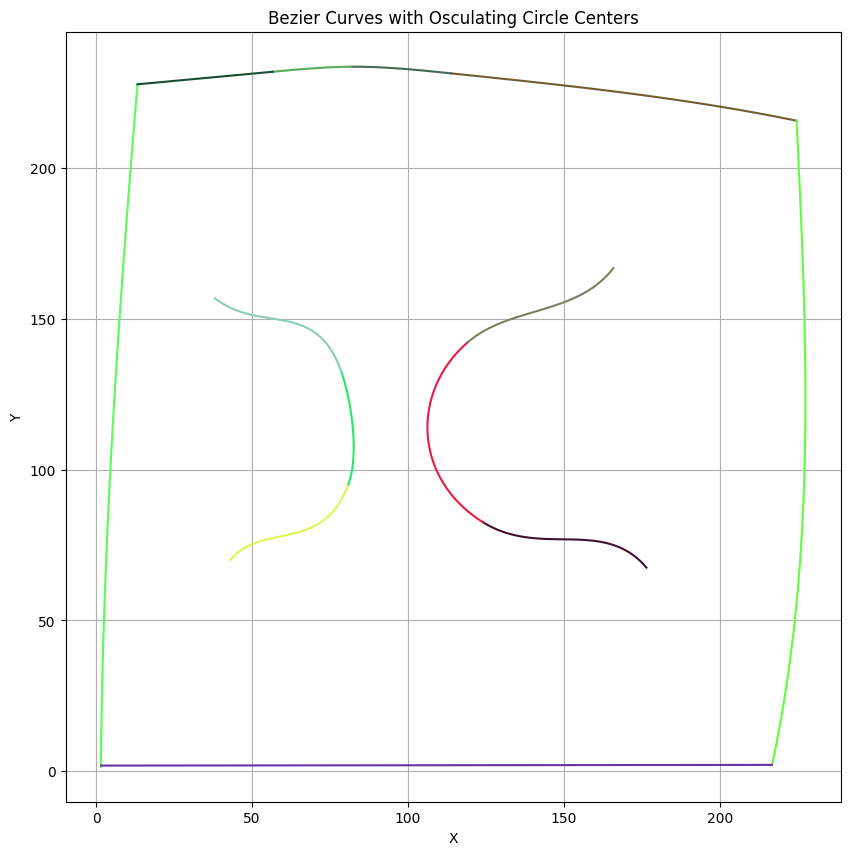

In [8]:
# print(extract_bezier_curves('data/problems/frag0.svg')[0])
# print(process_bezier_and_circles(extract_bezier_curves('data/problems/frag0.svg')[0]))
non_looped_curves, looped, circle_fits = process_bezier_and_circles(extract_bezier_curves('data/problems/frag0.svg')[0])
# print(non_looped_curves)
plot_bezier_curves(non_looped_curves,extract_bezier_curves('data/problems/frag0.svg')[1], threshold=100.0)
# plot_bezier_curves_by_cross_linear(non_looped_curves,extract_bezier_curves('data/problems/frag0.svg')[1], threshold=100.0, linear_tolerance=0.0525, show_centers=False)

[6.66595603e+01 6.66574729e+01 6.63426938e+01 6.60694988e+01
 6.18142197e+01 5.76851509e+01 5.34693531e+01 5.21255978e+01
 5.07643098e+01 4.94819844e+01 4.91365562e+01 4.87145953e+01
 4.81370315e+01 3.67948784e+01 3.84408367e+01 3.90919016e+01
 3.99837659e+01 4.29791232e+01 4.60403778e+01 4.90396183e+01
 5.03659428e+01 5.17456318e+01 5.30322413e+01 4.91789822e+01
 4.81105808e+01 4.72837573e+01 4.65163124e+01 4.37837015e+01
 4.09265442e+01 3.81959333e+01 3.71232170e+01 3.59413751e+01
 3.47396592e+01 3.46562754e+01 3.45203962e+01 3.44935218e+01
 2.74075713e+01 2.13600618e+01 1.43189528e+01 1.39301720e+01
 1.40066335e+01 1.38293665e+01 7.06248194e+00 1.28966894e+00
 5.48454719e+00 5.87209440e+00 5.79463284e+00 5.93914273e+00
 1.30085793e+01 1.91846400e+01 2.61854736e+01 2.65134649e+01
 2.64370033e+01 2.67232892e+01 2.95474214e+01 3.17839485e+01
 3.42675401e+01 3.78282076e+01 4.13251932e+01 4.48503188e+01
 4.55621234e+01 4.64257729e+01 4.71742082e+01 4.74342323e+01
 4.74407053e+01 4.763578

C:\Users\shubh\AppData\Local\Temp\ipykernel_8848\3308109681.py:67: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


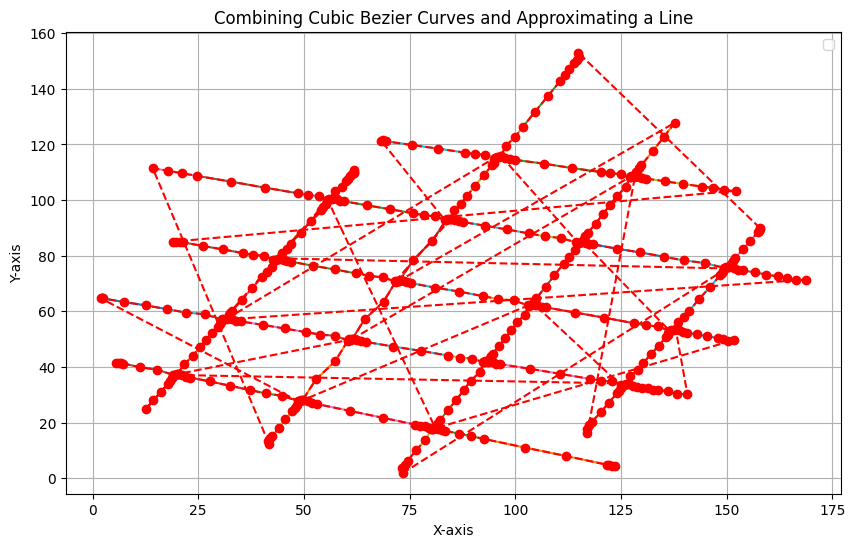

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

def combine_cubic_bezier_curves(control_points, tolerance=0.7):
    """
    Combine nearly identical starting or ending Bezier curve control points.
    Check if they form an approximate line within a given tolerance.
    
    Parameters:
    control_points (list of np.array): List of control points of the cubic Bezier curves.
    tolerance (float): Tolerance for combining points and line approximation.
    
    Returns:
    bool: True if the combined control points form an approximate line.
    np.array: Combined control points.
    np.poly1d: Fitted line equation if points form an approximate line.
    """
    # Combine nearly identical control points
    combined_points = [control_points[0][0]]
    for points in control_points:
        for point in points:
            # print(distance.euclidean(combined_points[-1], point) )
            if distance.euclidean(combined_points[-1], point) > tolerance:
                combined_points.append(point)
    
    combined_points = np.array(combined_points)
    
    if len(combined_points) < 2:
        return False, combined_points, None

    # Fit a line to the combined points
    line_params = np.polyfit(combined_points[:, 0], combined_points[:, 1], 1)
    fitted_line = np.poly1d(line_params)
    
    deviations = np.abs(fitted_line(combined_points[:, 0]) - combined_points[:, 1])
    
    print(deviations)
    # Check if all deviations are within the tolerance
    if np.all(deviations <= tolerance):
        return True, combined_points, fitted_line
    else:
        return False, combined_points, None

# Example usage
control_points = extract_bezier_curves('data/problems/frag2.svg')[0]

tolerance = 0.01
is_line, combined_points, fitted_line = combine_cubic_bezier_curves(control_points, tolerance)

# Plotting
plt.figure(figsize=(10, 6))

# Plot the original Bezier curves control points
for points in control_points:
    plt.plot(points[:, 0], points[:, 1])

# Plot the combined points
plt.plot(combined_points[:, 0], combined_points[:, 1], 'ro--')

if is_line:
    # Plot the approximated line
    x_vals = np.linspace(np.min(combined_points[:, 0]), np.max(combined_points[:, 0]), 100)
    y_vals = fitted_line(x_vals)
    plt.plot(x_vals, y_vals, 'r--', label='Approximated Line')

plt.legend()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Combining Cubic Bezier Curves and Approximating a Line')
plt.grid(True)
plt.show()


# combine_cubic_bezier_curves(extract_bezier_curves('data/problems/frag1.svg')[0])

In [10]:
# [0],extract_bezier_curves('data/problems/frag1.svg')[1], threshold=100.0, linear_tolerance=0.027, show_centers=False)# plot_bezier_curves_by_cross_linear(extract_bezier_curves('data/problems/frag2.svg')

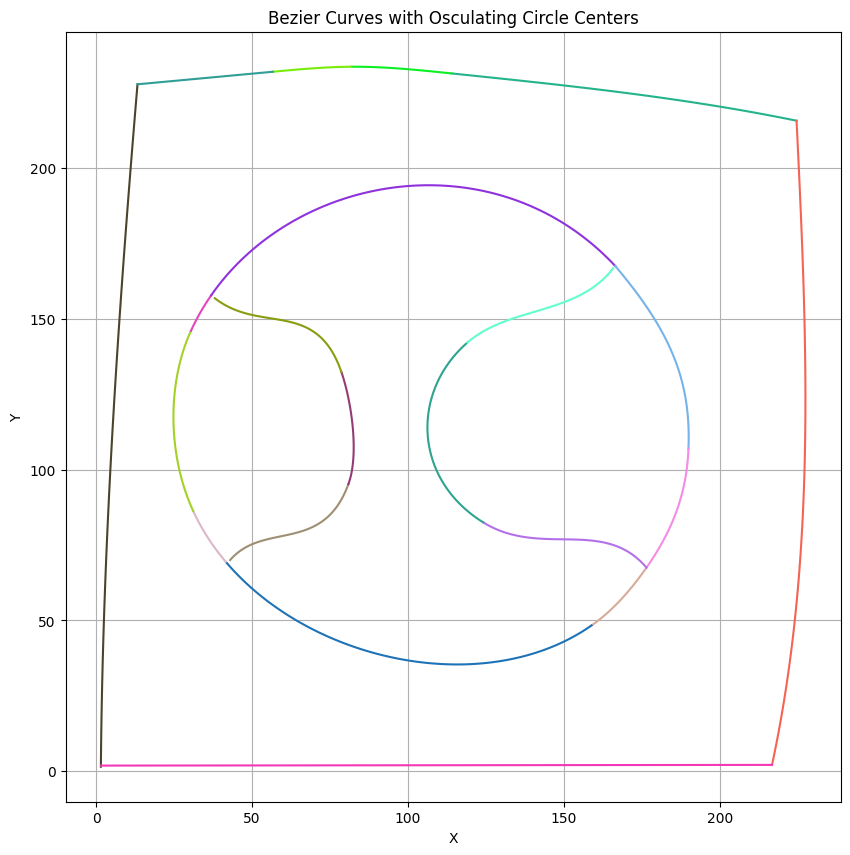

rem [array([[41.942, 68.98 ],
       [37.584, 74.219],
       [33.91 , 80.   ],
       [31.114, 86.269]]), array([[ 31.114,  86.269],
       [ 23.136, 104.156],
       [ 22.448, 128.023],
       [ 30.39 , 146.018]]), array([[ 30.39 , 146.018],
       [ 32.226, 150.179],
       [ 34.409, 154.115],
       [ 36.891, 157.808]]), array([[176.5  ,  67.5  ],
       [171.555,  60.218],
       [165.893,  53.421],
       [158.893,  48.348]]), array([[158.893,  48.348],
       [125.487,  24.137],
       [ 69.766,  35.53 ],
       [ 41.942,  68.98 ]]), array([[42.964, 70.031],
       [53.818, 82.981],
       [72.618, 71.863],
       [80.894, 95.184]]), array([[ 80.894,  95.184],
       [ 84.384, 105.02 ],
       [ 81.922, 122.488],
       [ 78.675, 132.286]]), array([[ 78.675, 132.286],
       [ 70.545, 156.818],
       [ 52.746, 144.905],
       [ 38.041, 156.835]]), array([[ 36.891, 157.808],
       [ 64.31 , 198.601],
       [128.306, 209.766],
       [166.5  , 167.5  ]]), array([[166.5  , 167.

c:\Data\Projects\Adobe_Gensolve\bezier_utils\mergeBezier.py:120: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


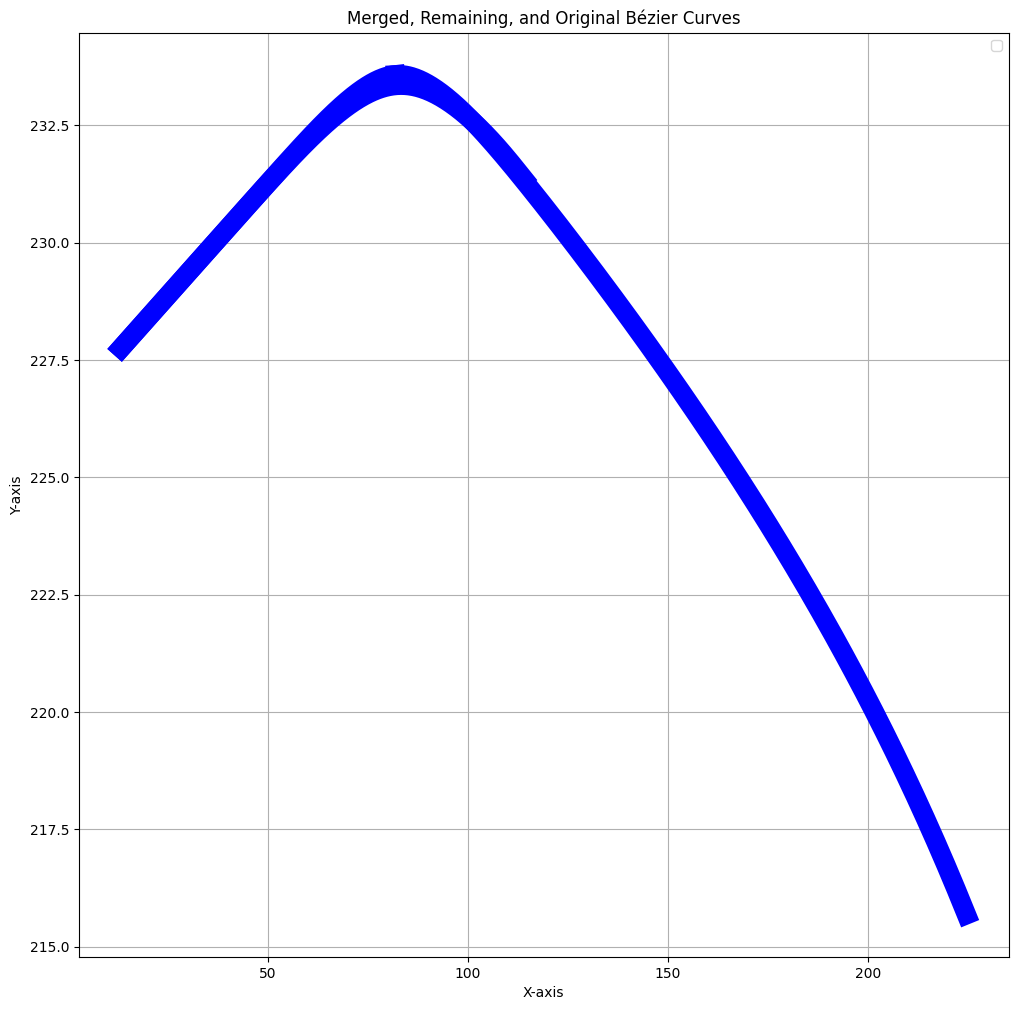

In [11]:
beziers = extract_bezier_curves('data/problems/frag1.svg')[0]
plot_bezier_curves( extract_bezier_curves('data/problems/frag1.svg')[0],  extract_bezier_curves('data/problems/frag1.svg')[1])
merged_beziers, remaining_beziers = merge_beziers(beziers)

print("rem" , remaining_beziers)

print("Merged Bézier Curves:")
for i, curve in enumerate(merged_beziers):
    print(f"Curve {i+1} with control points: {curve}")

print("\nRemaining Bézier Curves:")
for i, curve in enumerate(remaining_beziers):
    print(f"Curve {i+1} with control points: {curve}")

plot_beziers(merged_beziers, remaining_beziers, beziers)

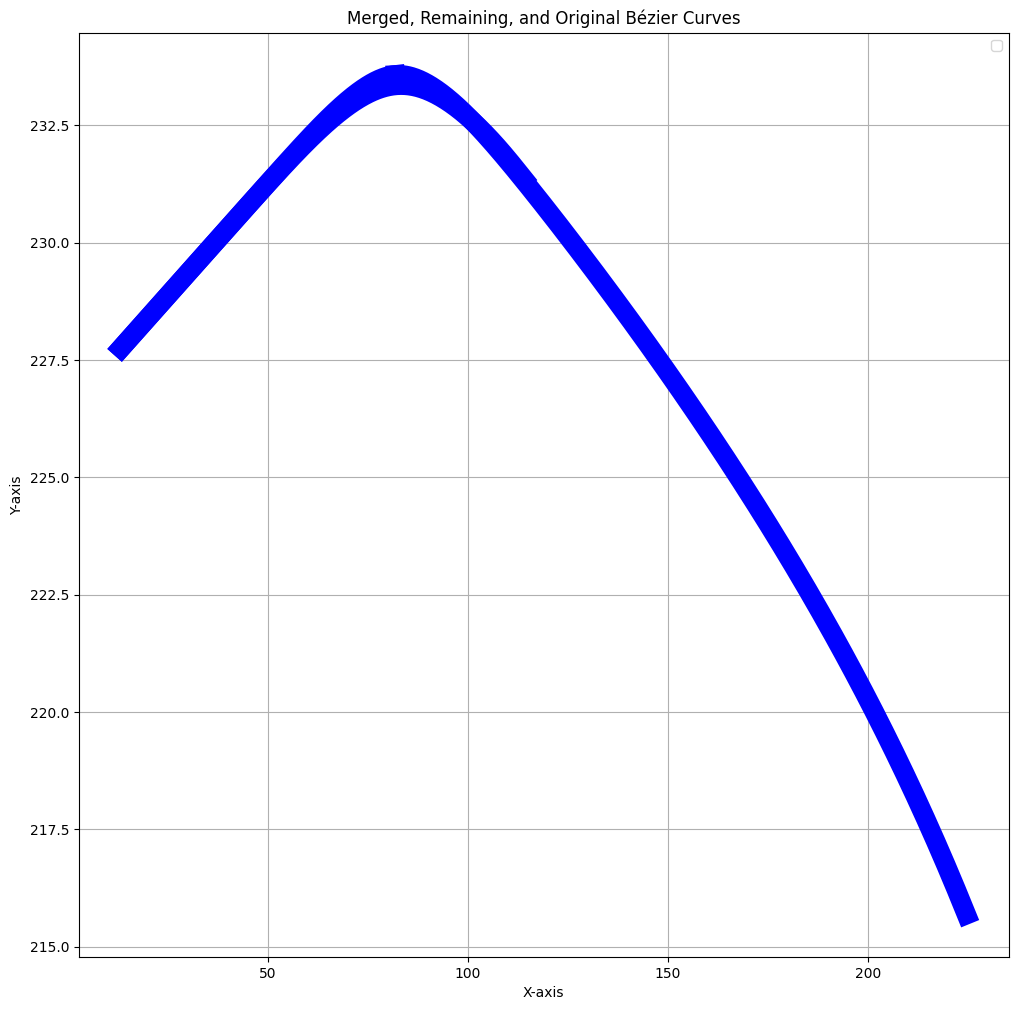

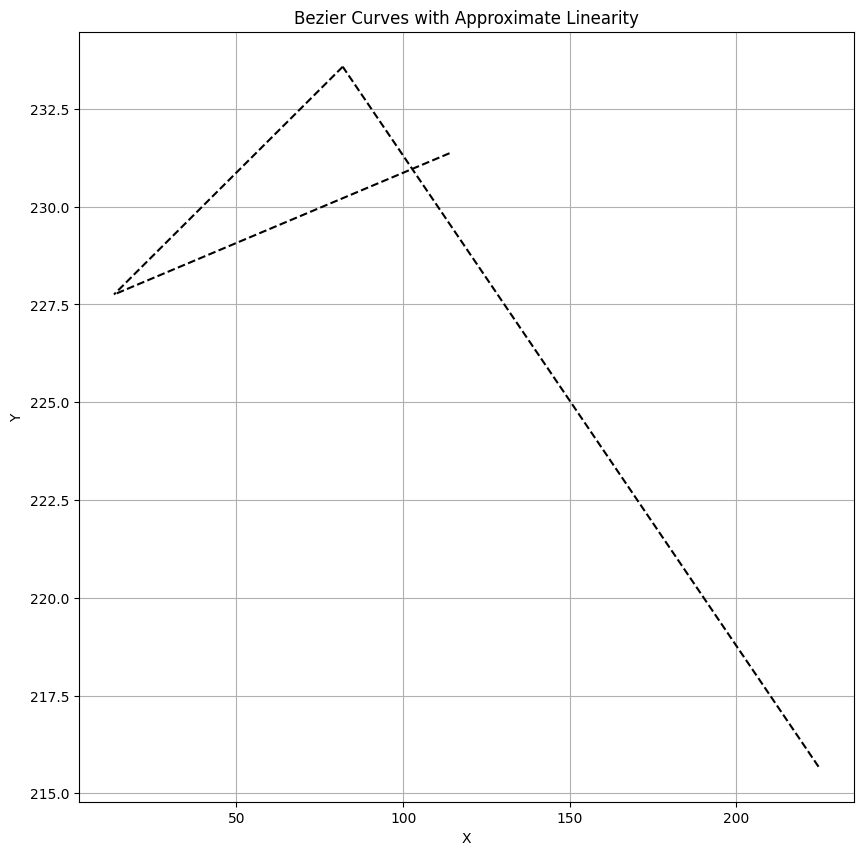

In [12]:
import numpy as np

def bezier_distance(p1, p2):
    return np.linalg.norm(p1 - p2)

def merge_bezier_curves(bezier_curves, tolerance):
    merged_curves = []
    i = 0
    while i < len(bezier_curves):
        current_curve = bezier_curves[i]
        while i + 1 < len(bezier_curves) and bezier_distance(current_curve[-1], bezier_curves[i + 1][0]) < tolerance:
            next_curve = bezier_curves[i + 1]
            current_curve = approximate_bezier([current_curve, next_curve], tolerance)
            i += 1
        merged_curves.append(current_curve)
        i += 1
    return merged_curves

def approximate_bezier(curves, tolerance):
    # Implement a method to approximate the given curves within the tolerance
    # This could be done using least squares fitting or other methods
    # For simplicity, let's assume we just average the control points here
    all_points = np.vstack(curves)
    averaged_points = np.mean(all_points, axis=0)
    return averaged_points

# Example usage
bezier_curves = [
    np.array([[0, 0], [1, 2], [2, 2], [3, 0]]),
    np.array([[3, 0], [4, -2], [5, -2], [6, 0]]),
    np.array([[10, 0], [11, 2], [12, 2], [13, 0]])
]

tolerance = 1.0
merged_curves = merge_bezier_curves(bezier_curves, tolerance)
# print(merged_curves)
plot_beziers(merged_beziers, remaining_beziers, beziers)

plot_bezier_curves_by_cross_linear(merged_beziers,extract_bezier_curves('data/problems/frag0.svg')[1], threshold=100.0, linear_tolerance=0.0525, show_centers=False)


Tolerance: 2


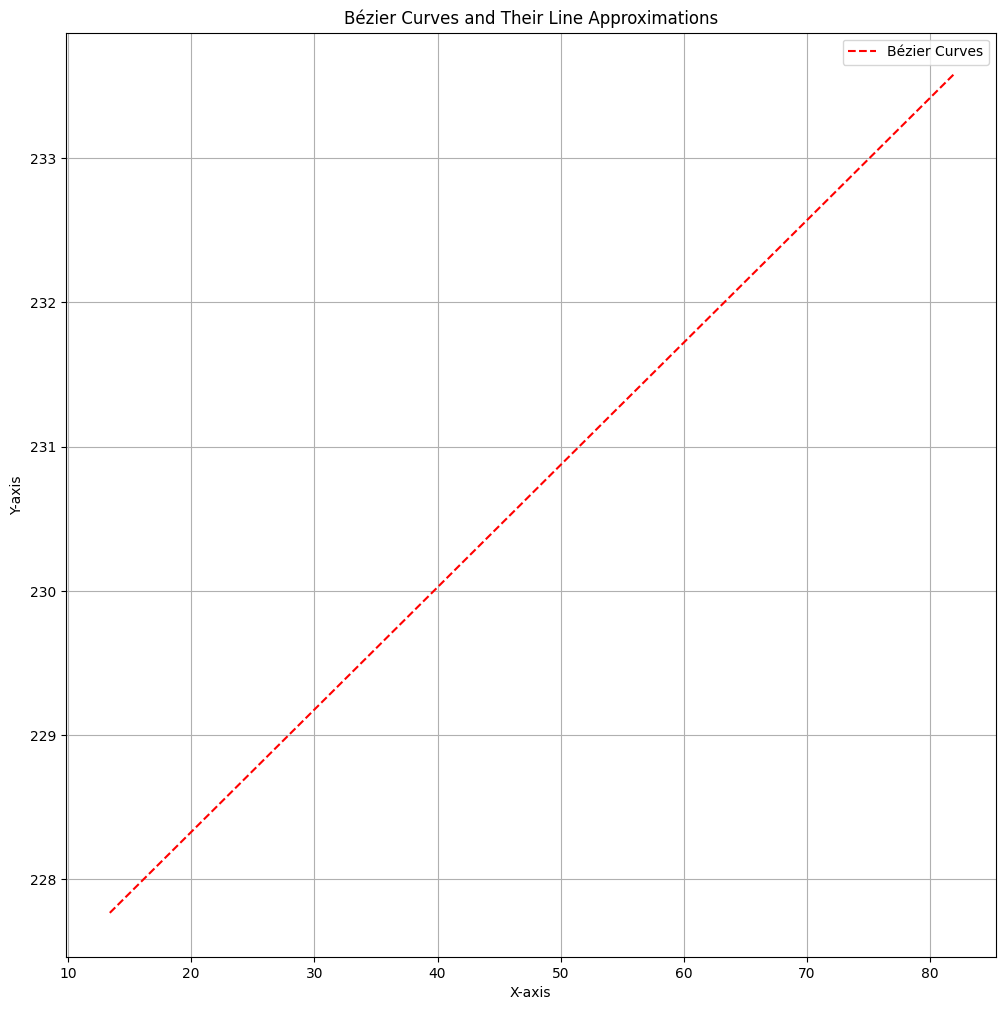

Tolerance: 2.5


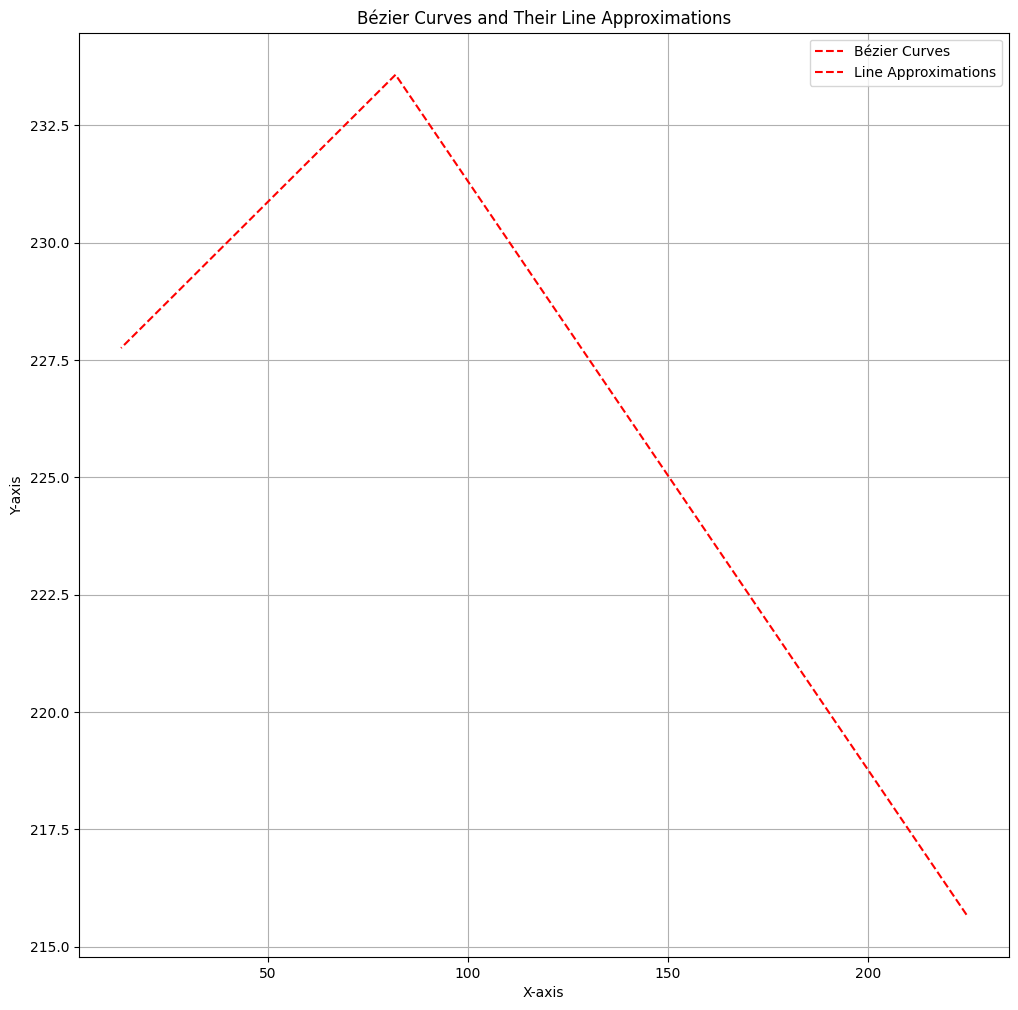

Tolerance: 3


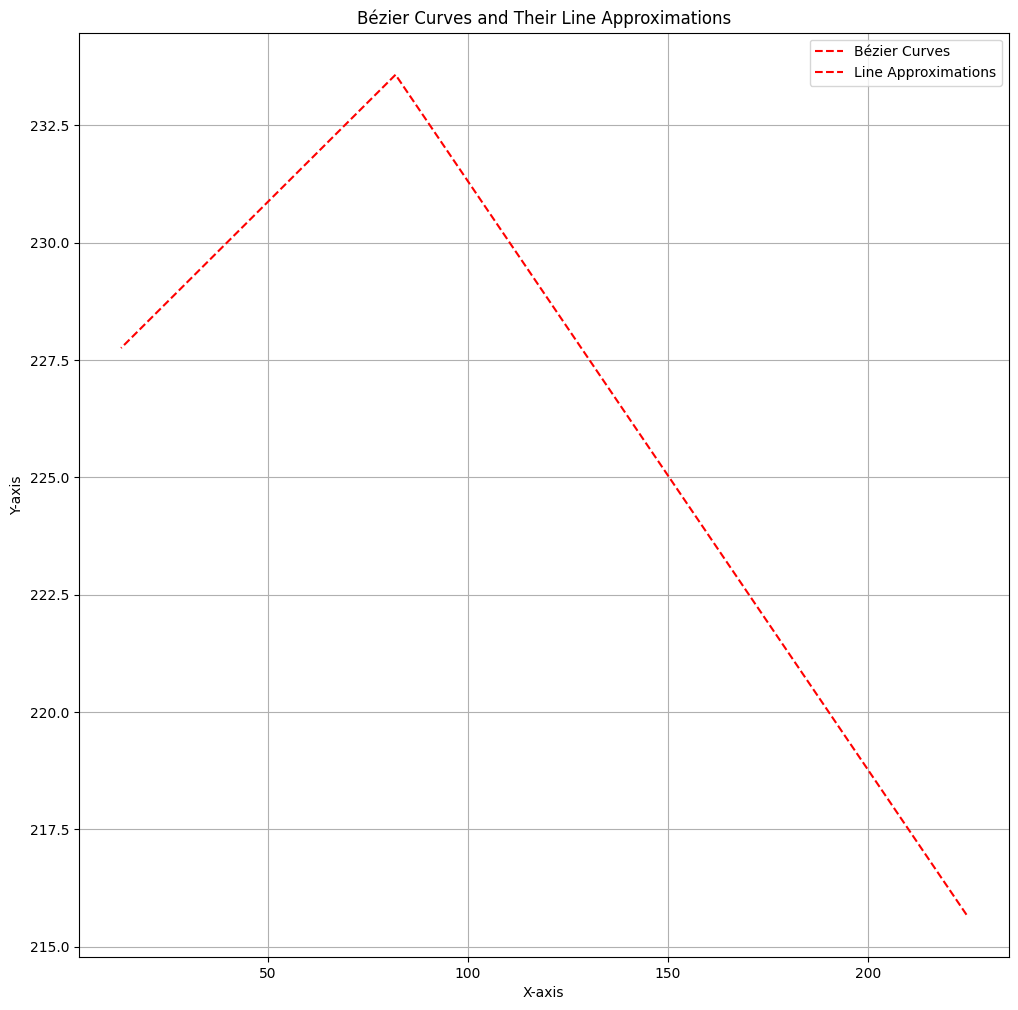

Tolerance: 5


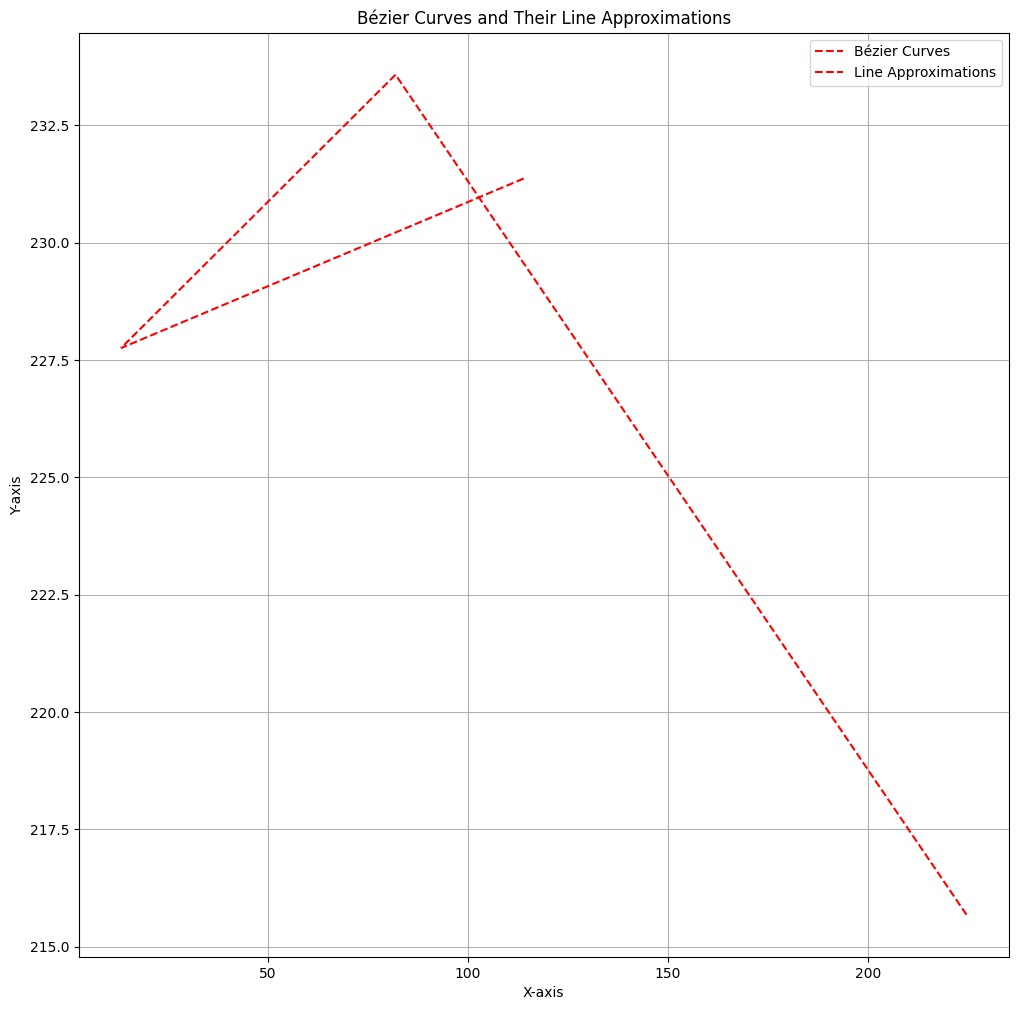

Tolerance: 10


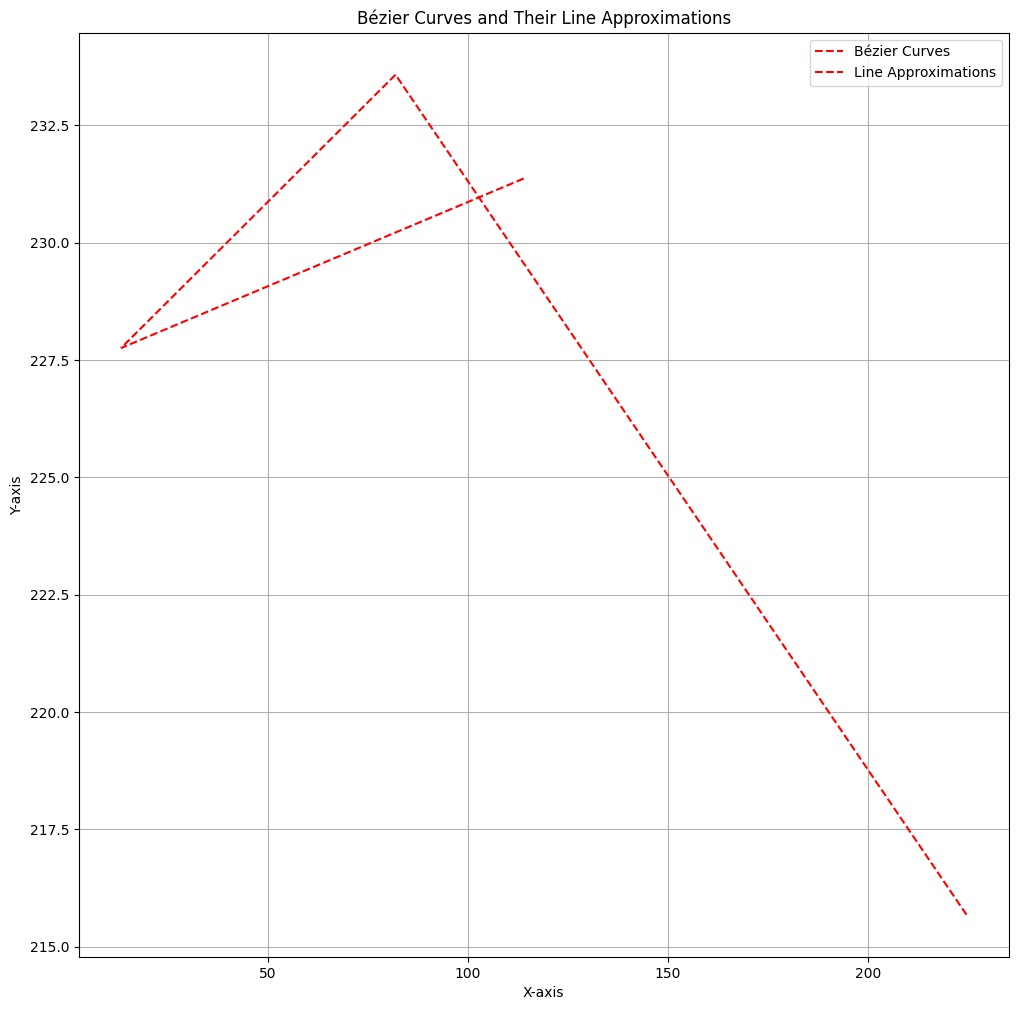

Tolerance: 12


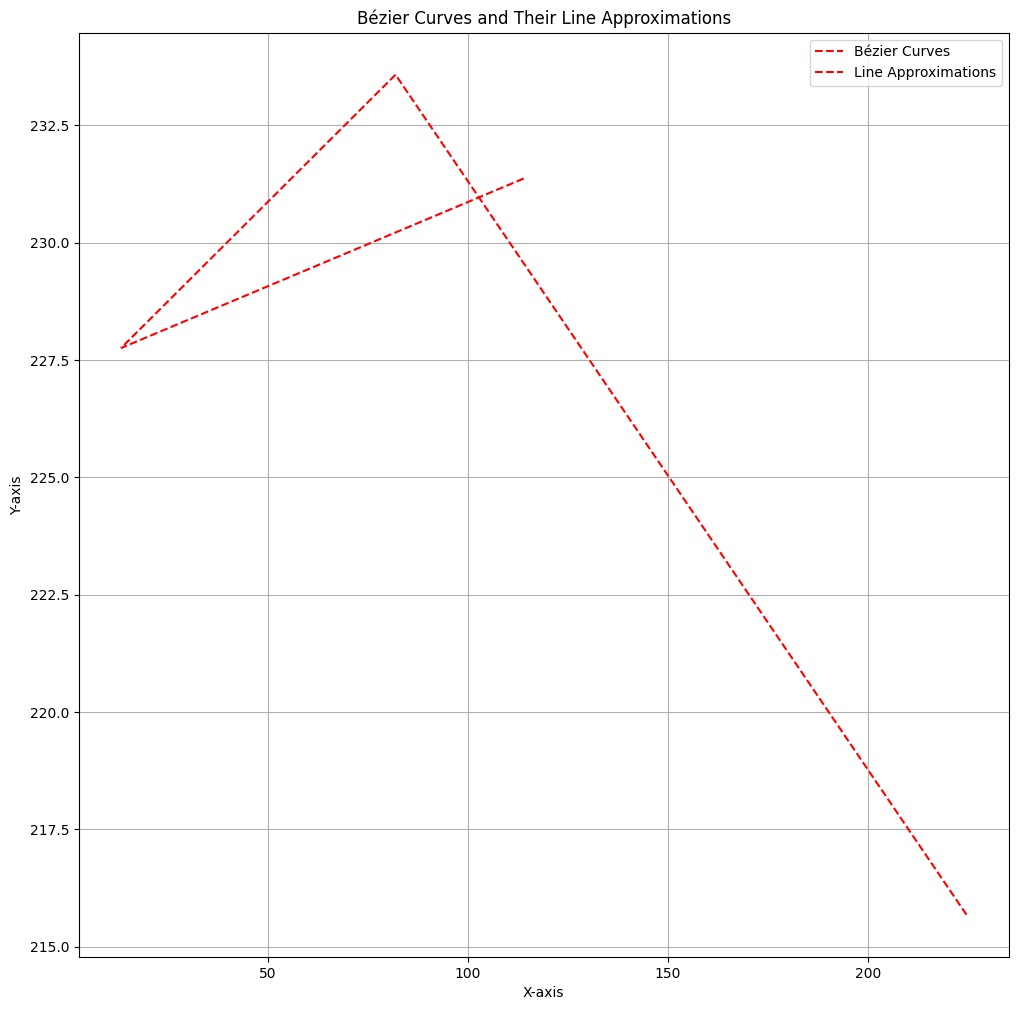

Tolerance: 50


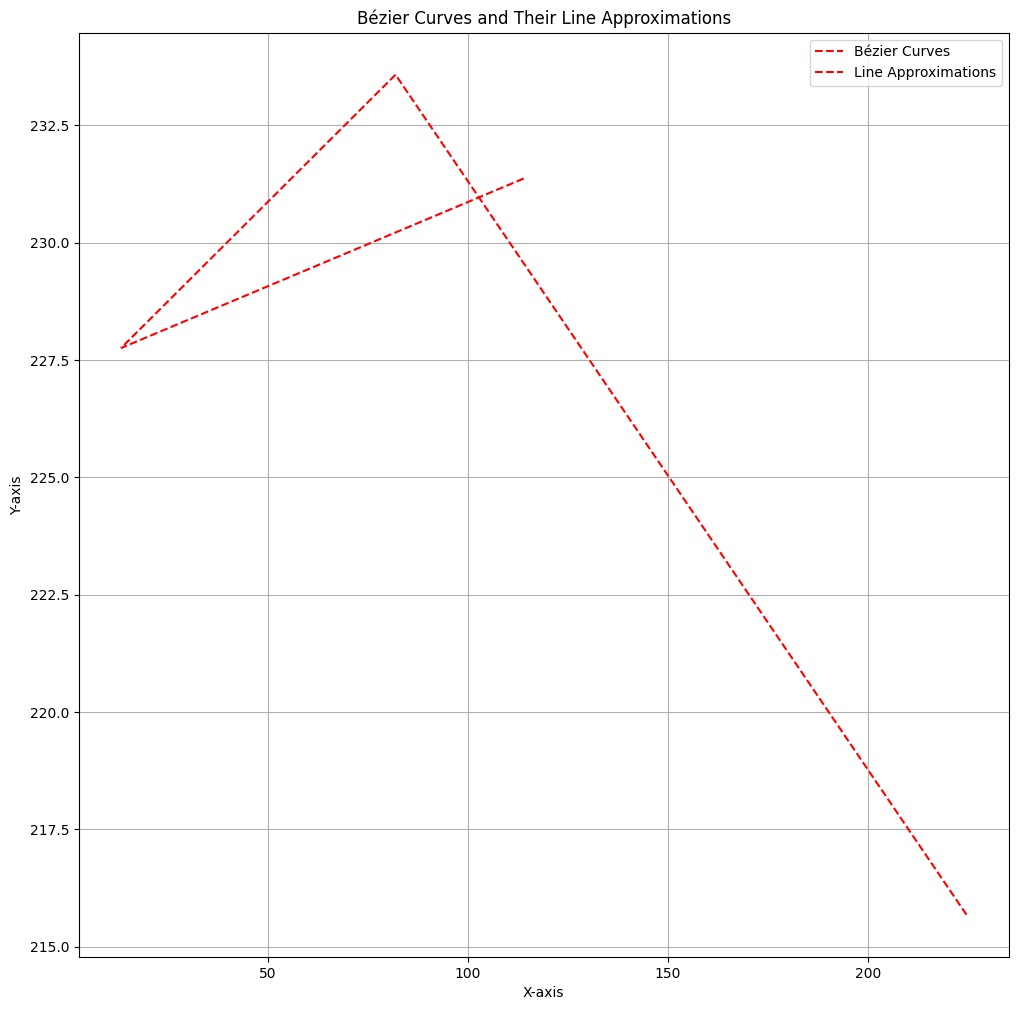

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from scipy.special import comb
from sklearn.linear_model import LinearRegression

def bernstein_poly(i, n, t):
    return comb(n, i) * (t**i) * ((1 - t)**(n - i))

def bezier_curve(control_points, num_points=300):
    n = len(control_points) - 1
    t = np.linspace(0, 1, num_points)
    curve_points = np.zeros((num_points, control_points.shape[1]))

    for i in range(n + 1):
        curve_points += bernstein_poly(i, n, t)[:, np.newaxis] * control_points[i]
    
    return curve_points

def line_equation(p1, p2):
    A = p2[1] - p1[1]
    B = p1[0] - p2[0]
    C = A * p1[0] + B * p1[1]
    return A, B, -C

def point_line_distance(point, line):
    A, B, C = line
    return abs(A * point[0] + B * point[1] + C) / np.sqrt(A**2 + B**2)

def approximate_bezier_to_line(bezier, tolerance=1e-2):
    curve_points = bezier_curve(bezier)
    start, end = curve_points[0], curve_points[-1]
    line = line_equation(start, end)
    
    max_distance = np.max([point_line_distance(point, line) for point in curve_points])
    
    if max_distance < tolerance:
        return start, end
    else:
        return None

def plot_approximations(merged_beziers, approximations):
    plt.figure(figsize=(12, 12))
    
    # for curve in merged_beziers:
    #     points = bezier_curve(curve)
    #     plt.plot(points[:, 0], points[:, 1], linestyle='-', color='blue')
    
    for line in approximations:
        if line is not None:
            plt.plot([line[0][0], line[1][0]], [line[0][1], line[1][1]], linestyle='--', color='red')
    
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Bézier Curves and Their Line Approximations')
    plt.grid(True)
    plt.legend(['Bézier Curves', 'Line Approximations'])
    plt.show()

tolerances = [2, 2.5, 3, 5, 10, 12, 50]

for tol in tolerances:
    approximations = [approximate_bezier_to_line(bezier, tolerance=tol) for bezier in merged_beziers]
    print(f"Tolerance: {tol}")
    plot_approximations(merged_beziers, approximations)

c:\Data\Projects\Adobe_Gensolve\bezier_utils\attributes.py:22: RuntimeWarning: divide by zero encountered in divide
  radius_of_curvature = 1 / np.abs(curvature)
c:\Data\Projects\Adobe_Gensolve\bezier_utils\attributes.py:29: RuntimeWarning: invalid value encountered in divide
  normal /= np.linalg.norm(normal, axis=1, keepdims=True)


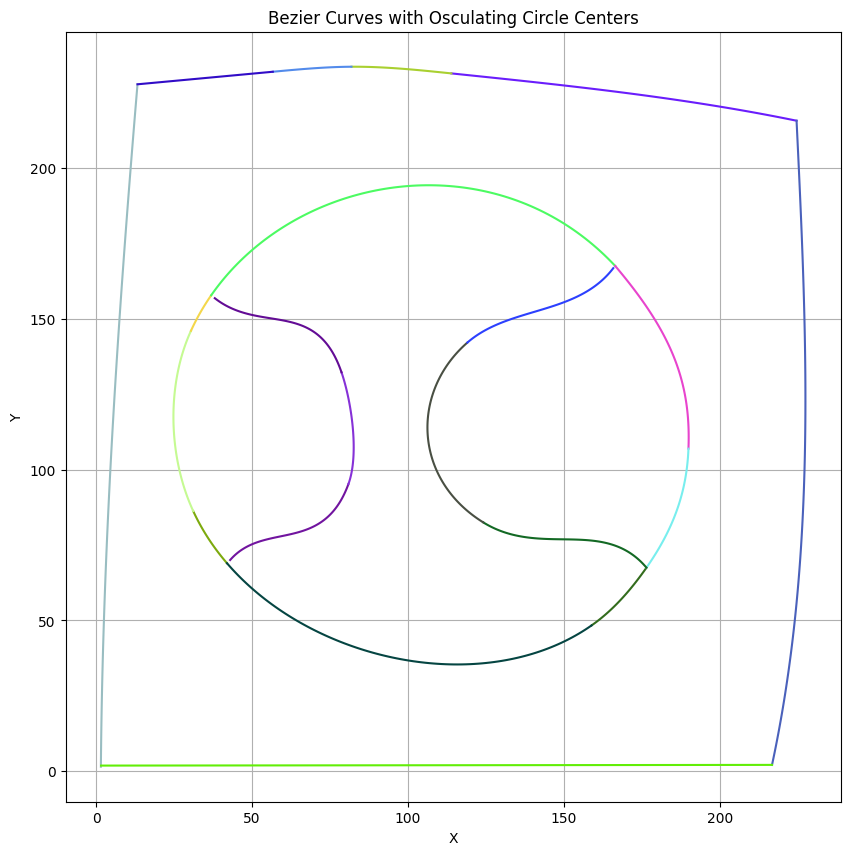

In [14]:
import numpy as np

def are_curves_overlapping(curve1, curve2, threshold):
    # Calculate the Euclidean distance between corresponding control points of two curves
    distances = np.linalg.norm(curve1 - curve2, axis=1)
    return np.all(distances < threshold)

def find_overlapping_groups(bezier_curves, threshold):
    n = len(bezier_curves)
    overlapping_groups = []
    visited = [False] * n

    for i in range(n):
        if not visited[i]:
            group = [i]
            visited[i] = True
            for j in range(i + 1, n):
                if are_curves_overlapping(bezier_curves[i], bezier_curves[j], threshold):
                    group.append(j)
                    visited[j] = True
            overlapping_groups.append(group)

    return overlapping_groups


def approximate_curve(group, bezier_curves):
    # Collect all control points from the group of curves
    control_points = np.concatenate([bezier_curves[i] for i in group], axis=0)
    
    # Find the centroid of the control points (average of points)
    approximated_curve = np.mean(control_points.reshape(-1, 4, 2), axis=0)
    
    return approximated_curve

def smoothen_curves(bezier_curves, threshold):
    overlapping_groups = find_overlapping_groups(bezier_curves, threshold)
    smoothed_curves = [approximate_curve(group, bezier_curves) for group in overlapping_groups]
    
    return smoothed_curves


smoothed_curves = smoothen_curves(beziers, 3)
plot_bezier_curves(smoothed_curves,extract_bezier_curves('data/problems/frag2.svg')[1], threshold=100.0)


c:\Data\Projects\Adobe_Gensolve\bezier_utils\mergeBezier.py:120: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


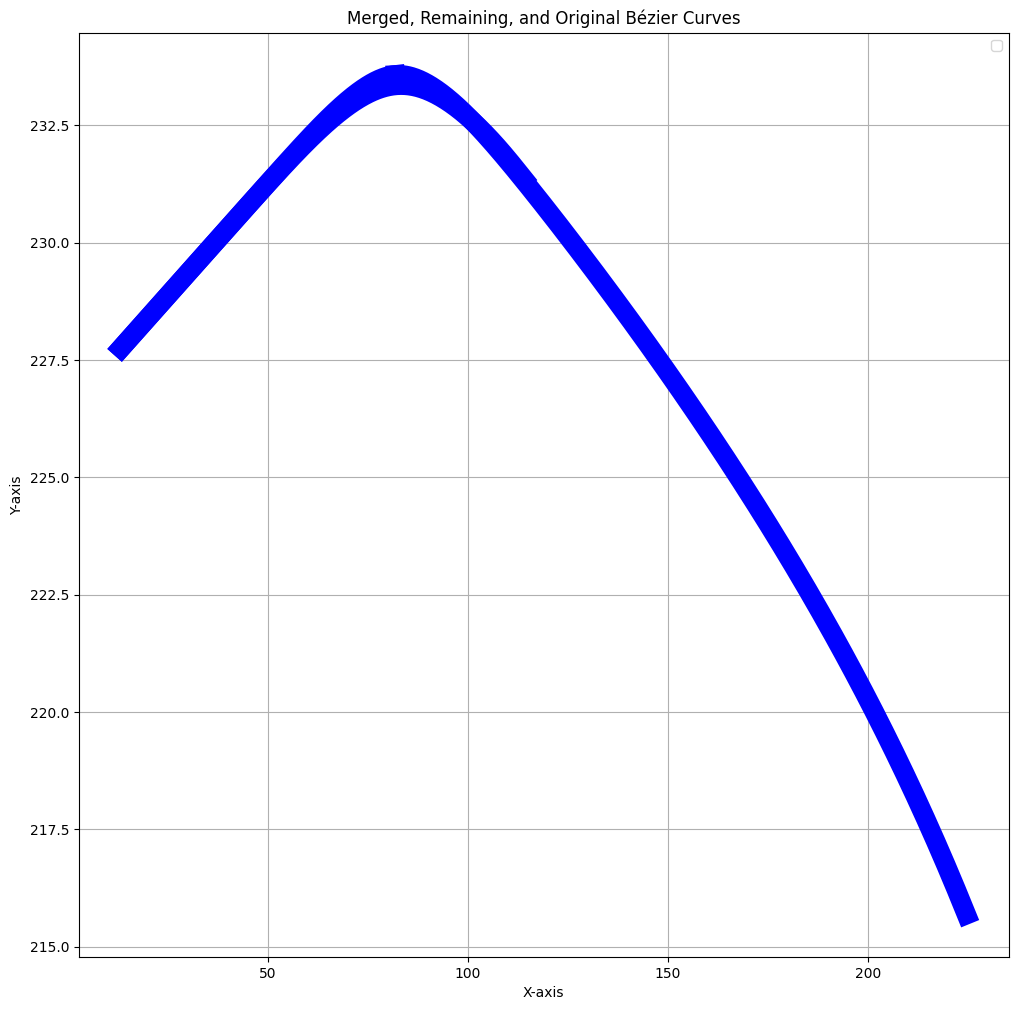

In [15]:
merged_beziers, remaining_beziers = merge_beziers(smoothed_curves)

# print("rem" , remaining_beziers)

# print("Merged Bézier Curves:")
# for i, curve in enumerate(merged_beziers):
#     print(f"Curve {i+1} with control points: {curve}")

# print("\nRemaining Bézier Curves:")
# for i, curve in enumerate(remaining_beziers):
#     print(f"Curve {i+1} with control points: {curve}")

plot_beziers(merged_beziers, remaining_beziers, smoothed_curves)

3
Tolerance: 1


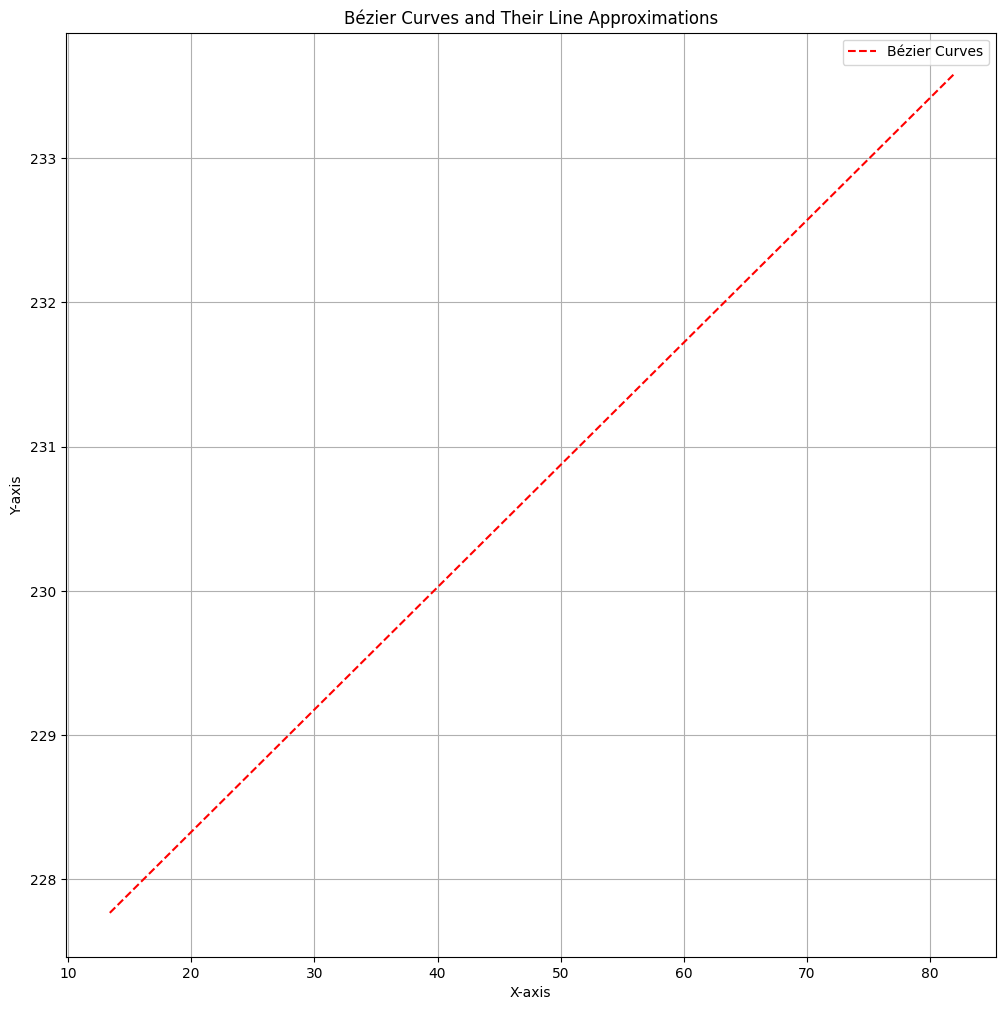

Tolerance: 0.1


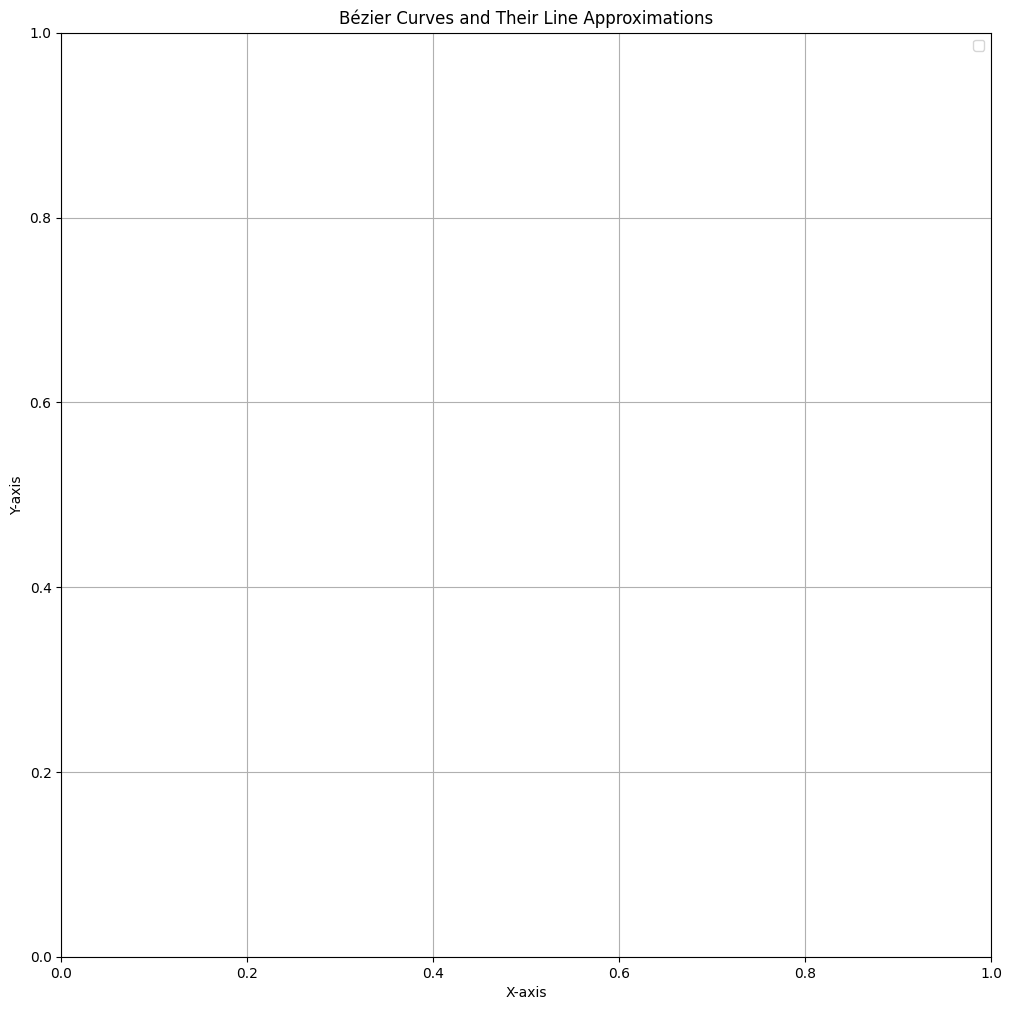

Tolerance: 2


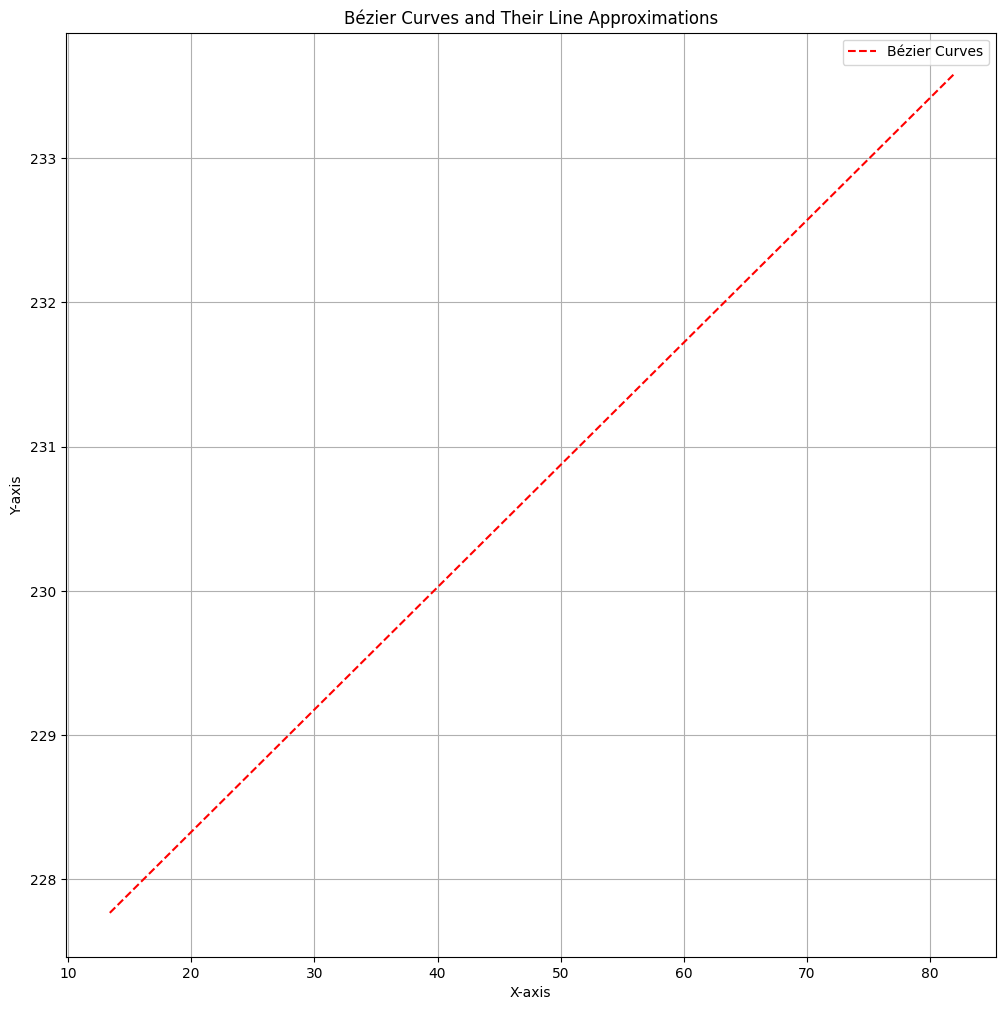

Tolerance: 2.5


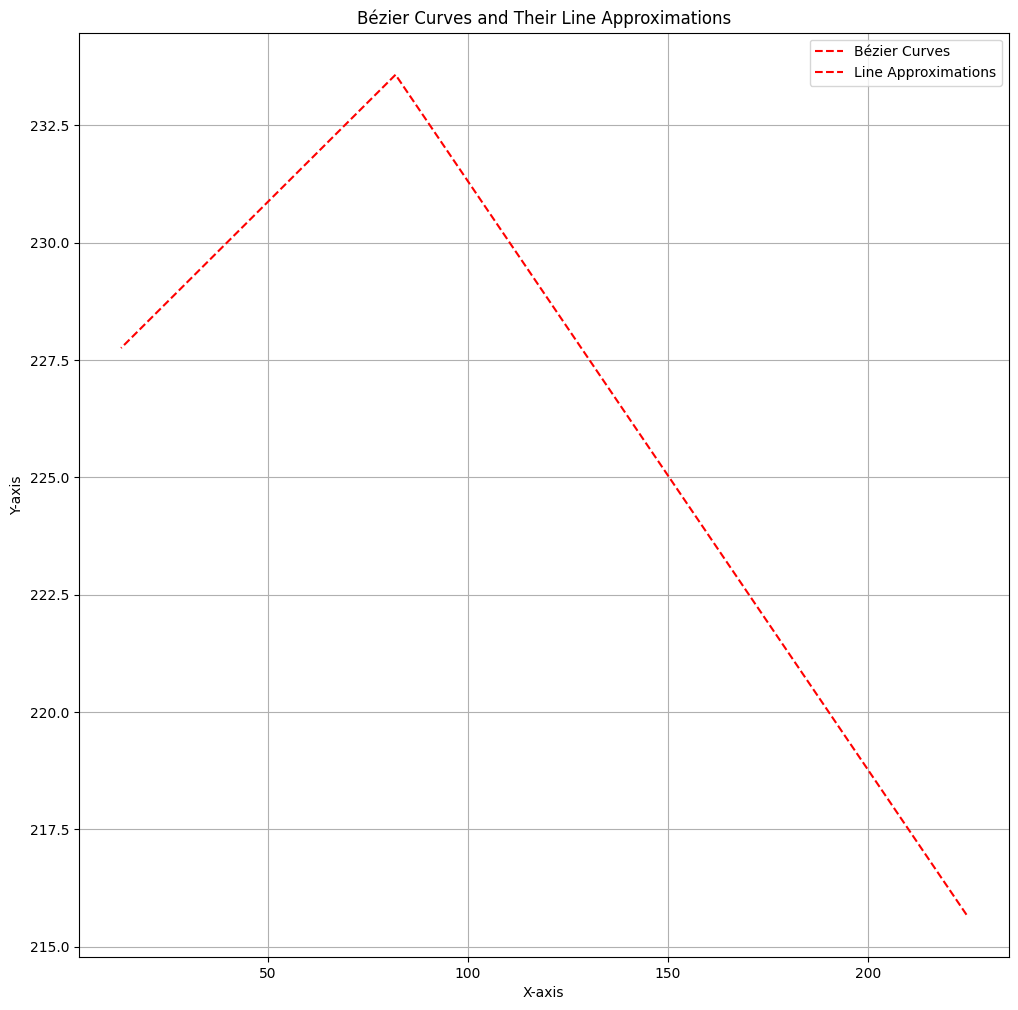

Tolerance: 3


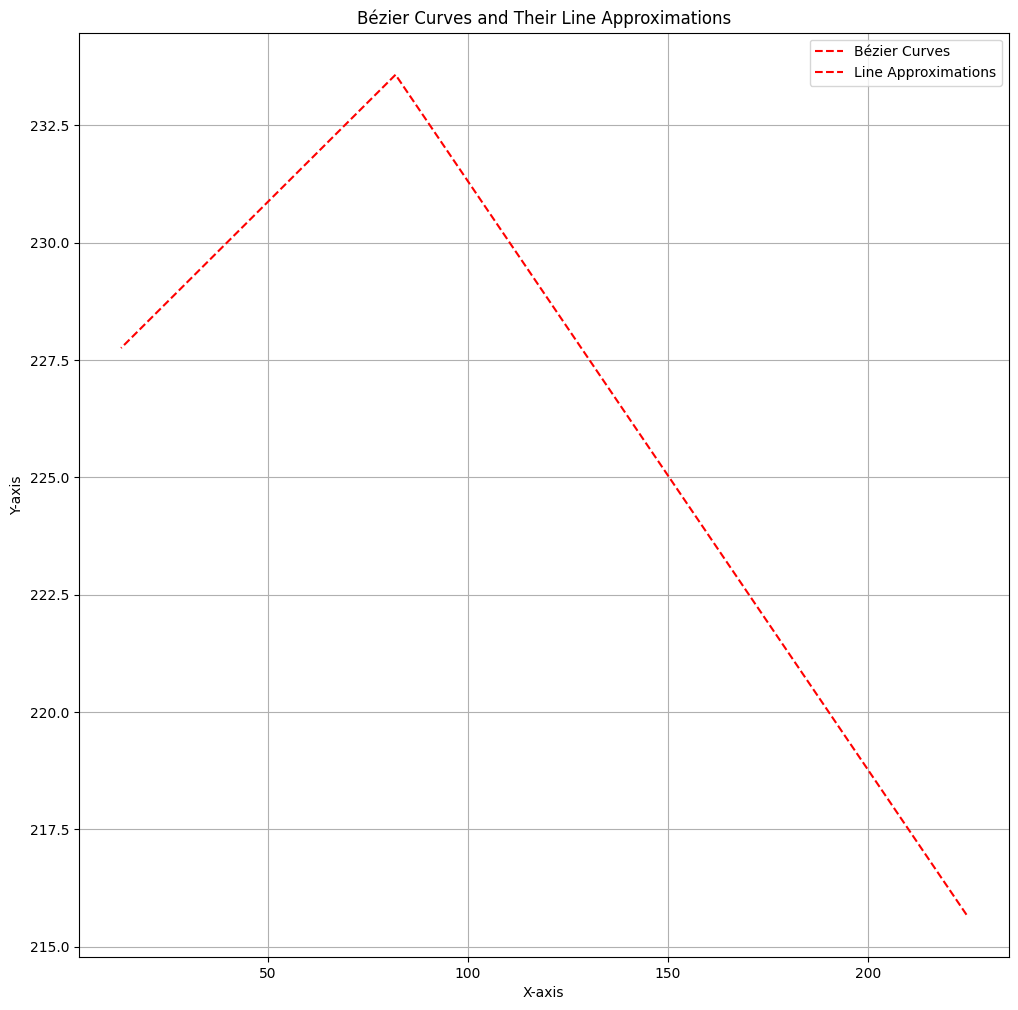

Tolerance: 5


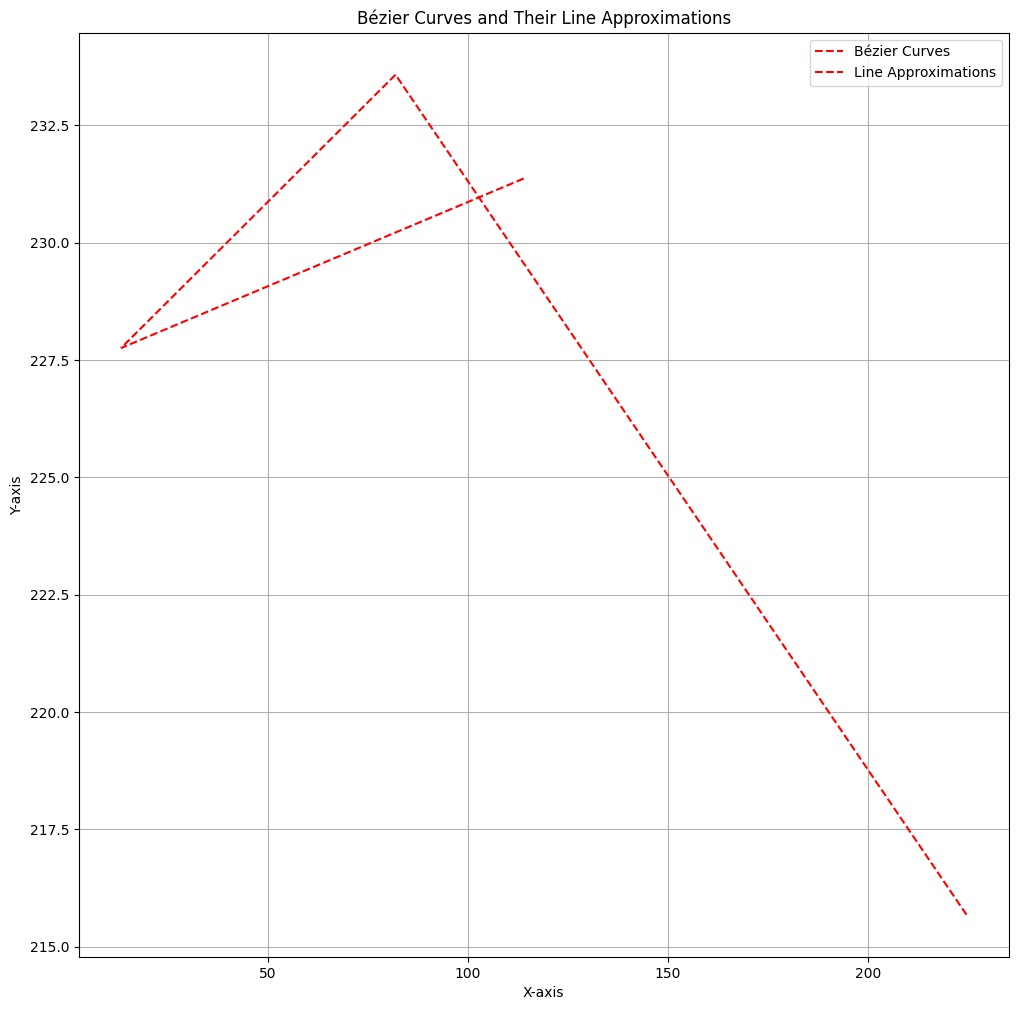

Tolerance: 10


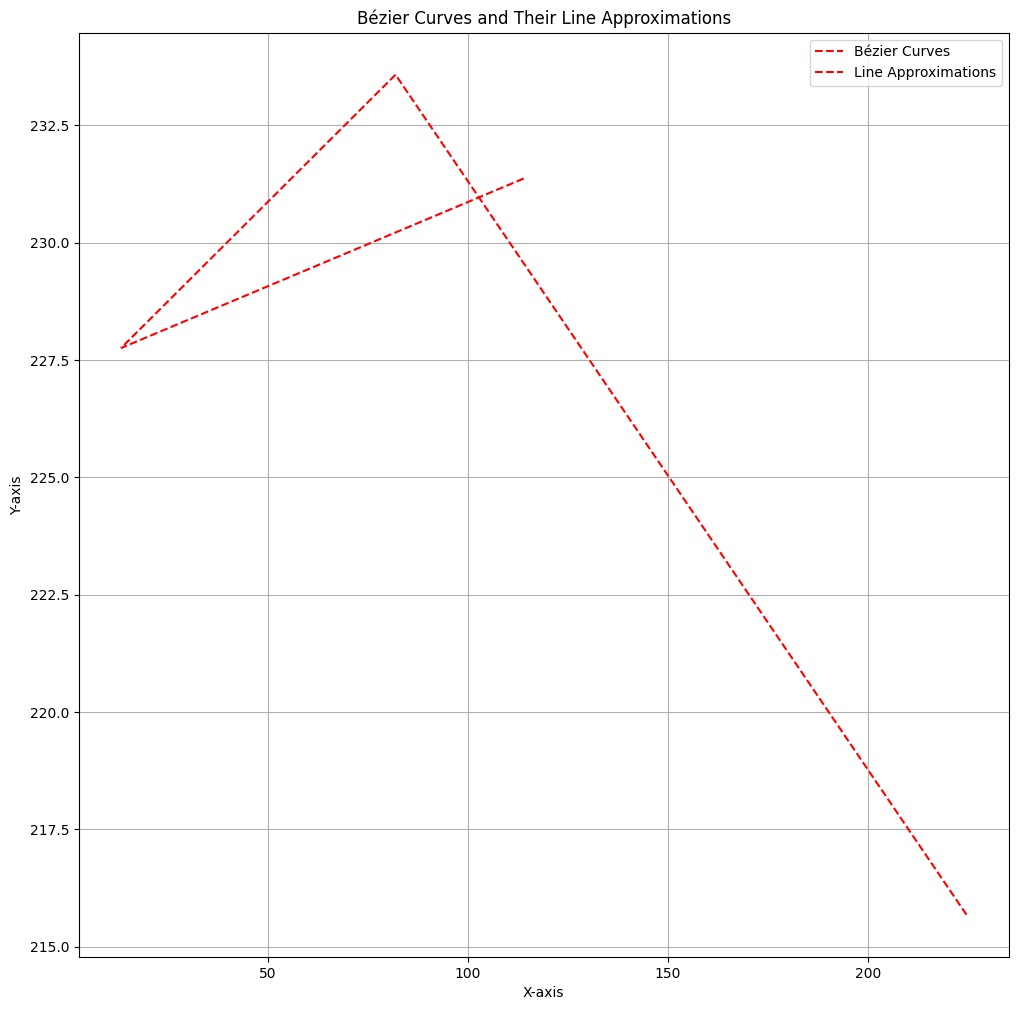

Tolerance: 12


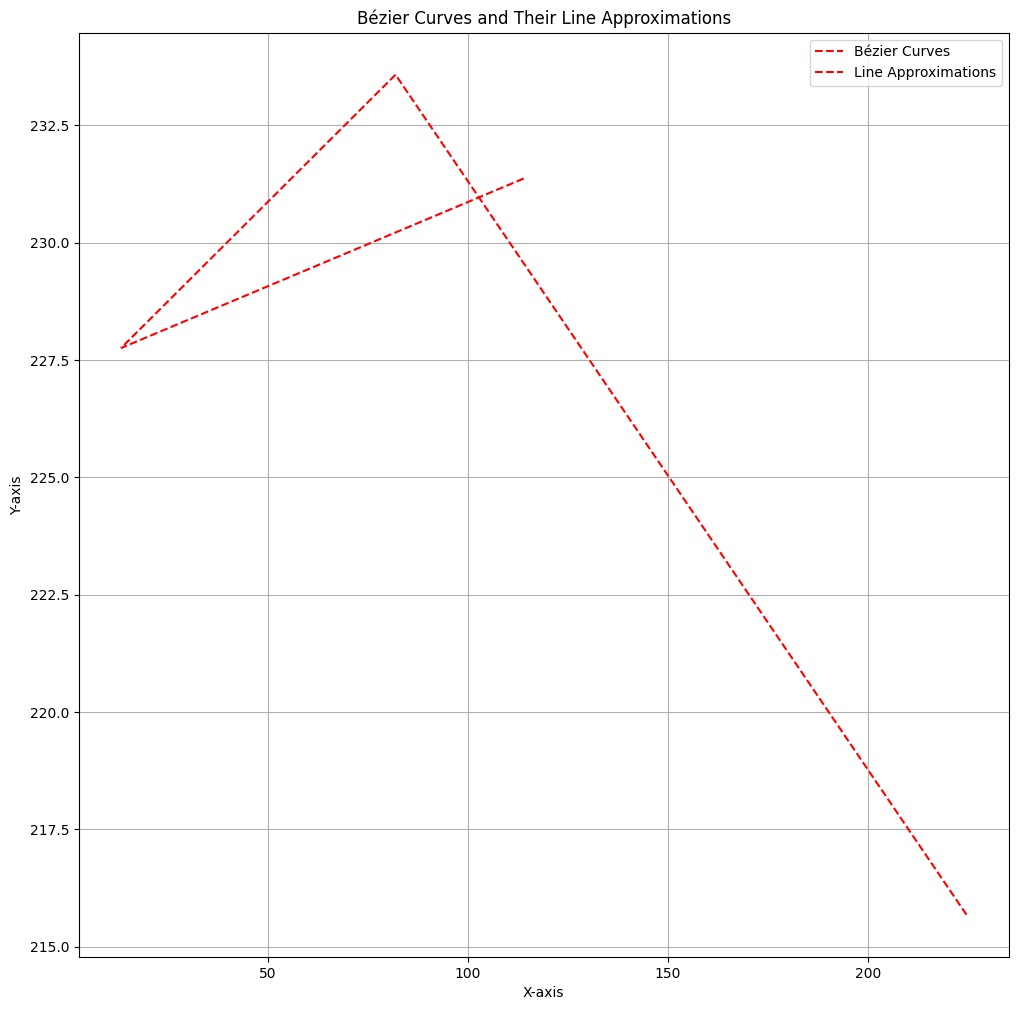

Tolerance: 50


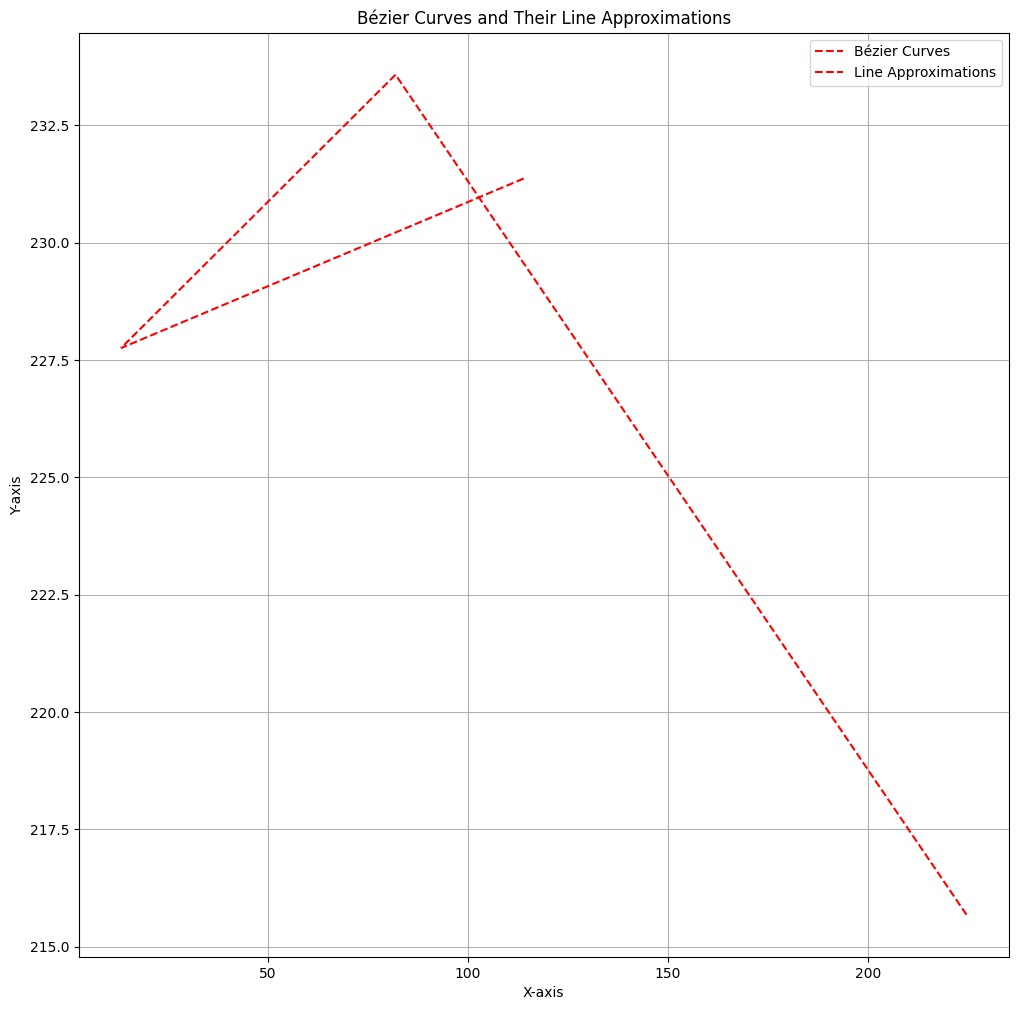

Tolerance: 100


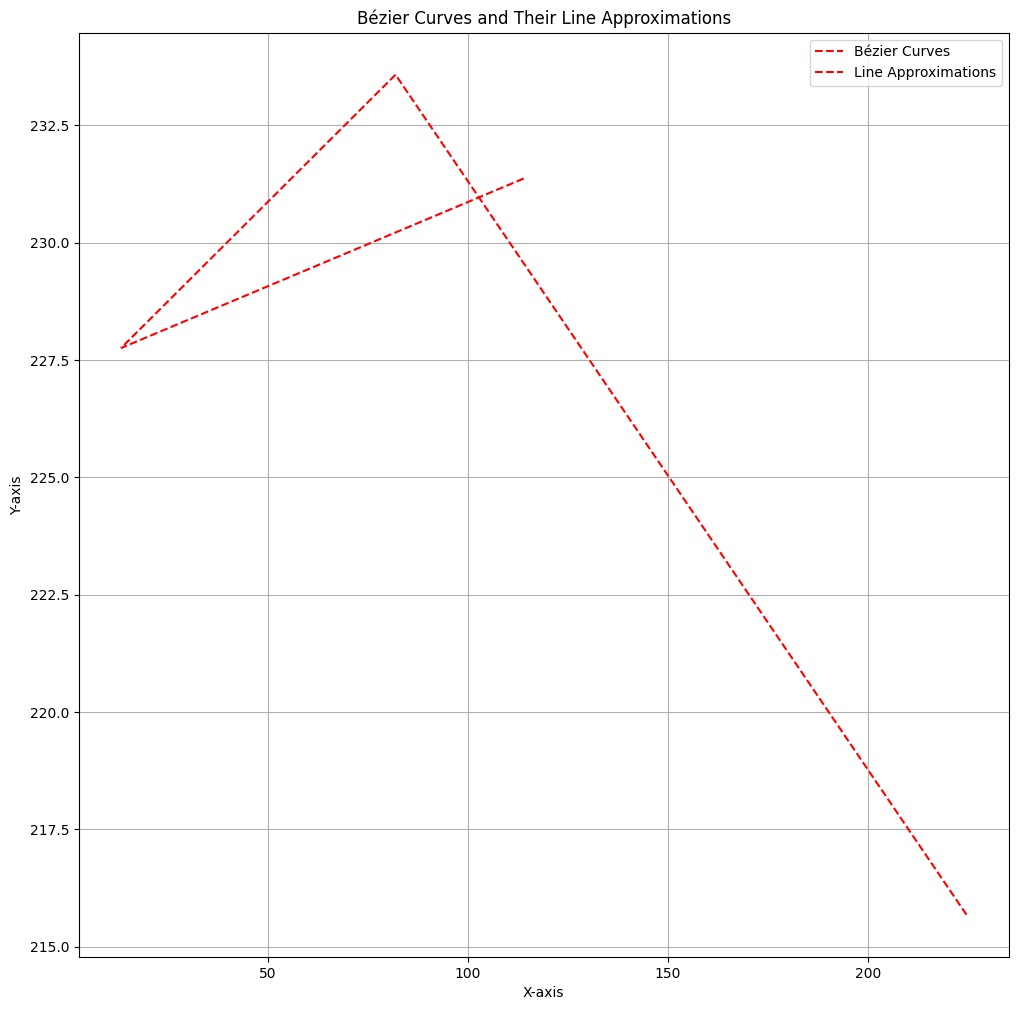

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from scipy.special import comb
from sklearn.linear_model import LinearRegression

def bernstein_poly(i, n, t):
    return comb(n, i) * (t**i) * ((1 - t)**(n - i))

def bezier_curve(control_points, num_points=300):
    n = len(control_points) - 1
    t = np.linspace(0, 1, num_points)
    curve_points = np.zeros((num_points, control_points.shape[1]))

    for i in range(n + 1):
        curve_points += bernstein_poly(i, n, t)[:, np.newaxis] * control_points[i]
    
    return curve_points

def line_equation(p1, p2):
    A = p2[1] - p1[1]
    B = p1[0] - p2[0]
    C = A * p1[0] + B * p1[1]
    return A, B, -C

def point_line_distance(point, line):
    A, B, C = line
    return abs(A * point[0] + B * point[1] + C) / np.sqrt(A**2 + B**2)

def approximate_bezier_to_line(bezier, tolerance=1e-2):
    curve_points = bezier_curve(bezier)
    start, end = curve_points[0], curve_points[-1]
    line = line_equation(start, end)
    
    max_distance = np.max([point_line_distance(point, line) for point in curve_points])
    
    if max_distance < tolerance:
        return start, end
    else:
        return None

def plot_approximations(merged_beziers, approximations):
    plt.figure(figsize=(12, 12))
    
    for line in approximations:
        if line is not None:
            plt.plot([line[0][0], line[1][0]], [line[0][1], line[1][1]], linestyle='--', color='red')
    
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Bézier Curves and Their Line Approximations')
    plt.grid(True)
    plt.legend(['Bézier Curves', 'Line Approximations'])
    plt.show()

tolerances = [1, 0.1, 2, 2.5, 3, 5, 10, 12, 50, 100]

print(len(merged_beziers))

for tol in tolerances:
    approximations = [approximate_bezier_to_line(bezier, tolerance=tol) for bezier in merged_beziers]
    print(f"Tolerance: {tol}")
    plot_approximations(merged_beziers, approximations)

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline
import math

def bezier_curve(control_points, num_points=100):
    """Generate points on a cubic Bézier curve."""
    t = np.linspace(0, 1, num_points)
    n = len(control_points) - 1
    curve = np.zeros((num_points, 2))
    
    for i in range(num_points):
        point = np.zeros(2)
        for j in range(n + 1):
            binom_coeff = binomial_coefficient(n, j)
            point += binom_coeff * (t[i]**j) * ((1 - t[i])**(n - j)) * control_points[j]
        curve[i] = point
    
    return curve

def binomial_coefficient(n, k):
    """Compute binomial coefficient."""
    return math.factorial(n) / (math.factorial(k) * math.factorial(n - k))

def bezier_to_bspline(control_points):
    """Convert cubic Bézier curve control points to B-spline control points."""
    # Convert Bézier control points to B-spline control points
    return np.array([
        control_points[0],  # P0
        (2/3 * control_points[0] + 1/3 * control_points[1]),  # P1
        (1/3 * control_points[2] + 2/3 * control_points[3]),  # P2
        control_points[3]   # P3
    ])

# Cubic Bézier control points
bezier_control_points = np.array([[0, 0], [1, 2], [3, 2], [4, 0]])

# Generate Bézier curve points
bezier_curve_points = bezier_curve(bezier_control_points)

# Convert Bézier control points to B-spline control points
b_spline_control_points = bezier_to_bspline(bezier_control_points)

# Knot vector for a cubic B-spline with 4 control points (degree 3)
t = [0, 0, 0, 0, 1, 1, 1, 1]

# Create B-spline object
k = 3  # Degree of B-spline
bspline = BSpline(t, b_spline_control_points.T, k)

# Generate B-spline curve points
u = np.linspace(0, 1, 100)
b_spline_curve_points = bspline(u).T

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(bezier_curve_points[:, 0], bezier_curve_points[:, 1], label='Cubic Bézier Curve', color='blue')
plt.plot(b_spline_curve_points[:, 0], b_spline_curve_points[:, 1], label='B-Spline Curve', color='red')
plt.scatter(bezier_control_points[:, 0], bezier_control_points[:, 1], color='blue', marker='o', label='Bézier Control Points')
plt.scatter(b_spline_control_points[:, 0], b_spline_control_points[:, 1], color='red', marker='x', label='B-Spline Control Points')
plt.title('Cubic Bézier Curve and B-Spline Curve')
plt.legend()
plt.grid(True)
plt.show()


ValueError: Knots, coefficients and degree are inconsistent.

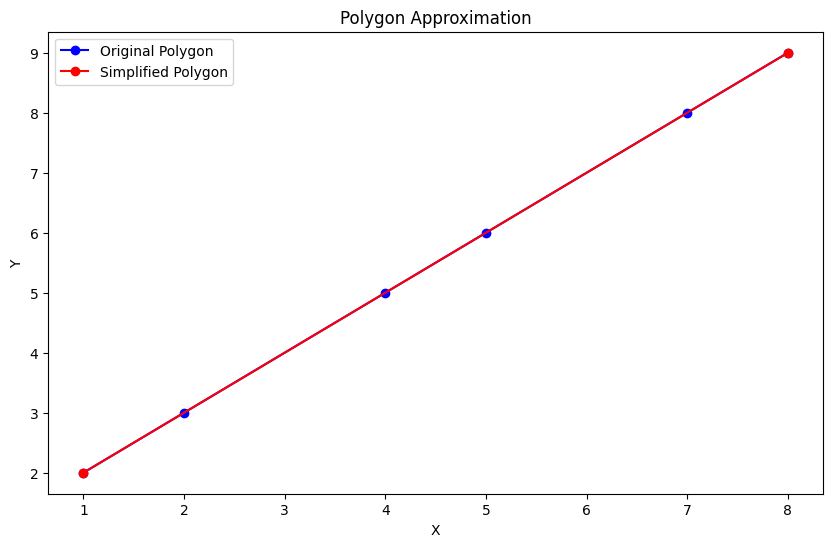

In [ ]:
import re
import numpy as np
from typing import List, Tuple
import matplotlib.pyplot as plt

def euclidean_distance(point1: np.ndarray, point2: np.ndarray) -> float:
    return np.linalg.norm(point1 - point2)

def rdp(points: np.ndarray, epsilon: float) -> List[Tuple[int, int]]:
    dmax = 0
    index = 0
    end = len(points)
    for i in range(1, end - 1):
        d = euclidean_distance(points[i], points[0]) + euclidean_distance(points[i], points[-1]) - euclidean_distance(points[0], points[-1])
        if d > dmax:
            index = i
            dmax = d

    if dmax > epsilon:
        results1 = rdp(points[:index + 1], epsilon)
        results2 = rdp(points[index:], epsilon)
        return results1[:-1] + results2
    else:
        return [tuple(points[0]), tuple(points[-1])]

# Step 1: Extract points using regex
polygon = "[(1, 2), (2, 3), (4, 5), (5, 6), (7, 8), (8, 9)]"
pattern = r'\((\d+), (\d+)\)'
matches = re.findall(pattern, polygon)
points = [(int(x), int(y)) for x, y in matches]

# Step 2: Simplify the polygon
points_array = np.array(points)
epsilon = 1.0
simplified_points = rdp(points_array, epsilon)

# Step 3: Plot the original and simplified polygons
original_points_x, original_points_y = zip(*points)
simplified_points_x, simplified_points_y = zip(*simplified_points)

plt.figure(figsize=(10, 6))
plt.plot(original_points_x, original_points_y, 'bo-', label='Original Polygon')
plt.plot(simplified_points_x, simplified_points_y, 'ro-', label='Simplified Polygon')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polygon Approximation')
plt.show()


[(np.float64(41.259605407714844), np.float64(69.81170654296875)), (np.float64(24.840965270996094), np.float64(114.08059692382812)), (np.float64(36.89099884033203), np.float64(157.80799865722656))]
[(np.float64(176.5), np.float64(67.5)), (np.float64(154.4789276123047), np.float64(45.430274963378906)), (np.float64(121.43103790283203), np.float64(35.587223052978516)), (np.float64(76.62258911132812), np.float64(43.63216781616211)), (np.float64(41.94200134277344), np.float64(68.9800033569336))]
[(np.float64(36.89099884033203), np.float64(157.80799865722656)), (np.float64(64.45032501220703), np.float64(183.1155548095703)), (np.float64(101.0795669555664), np.float64(194.0998992919922)), (np.float64(136.89283752441406), np.float64(188.44017028808594)), (np.float64(166.5), np.float64(167.5))]
[(np.float64(42.9640007019043), np.float64(70.03099822998047)), (np.float64(75.03977966308594), np.float64(85.08892059326172)), (np.float64(82.37525177001953), np.float64(102.47981262207031)), (np.float64(

C:\Users\shubh\AppData\Local\Temp\ipykernel_3432\3693975344.py:56: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


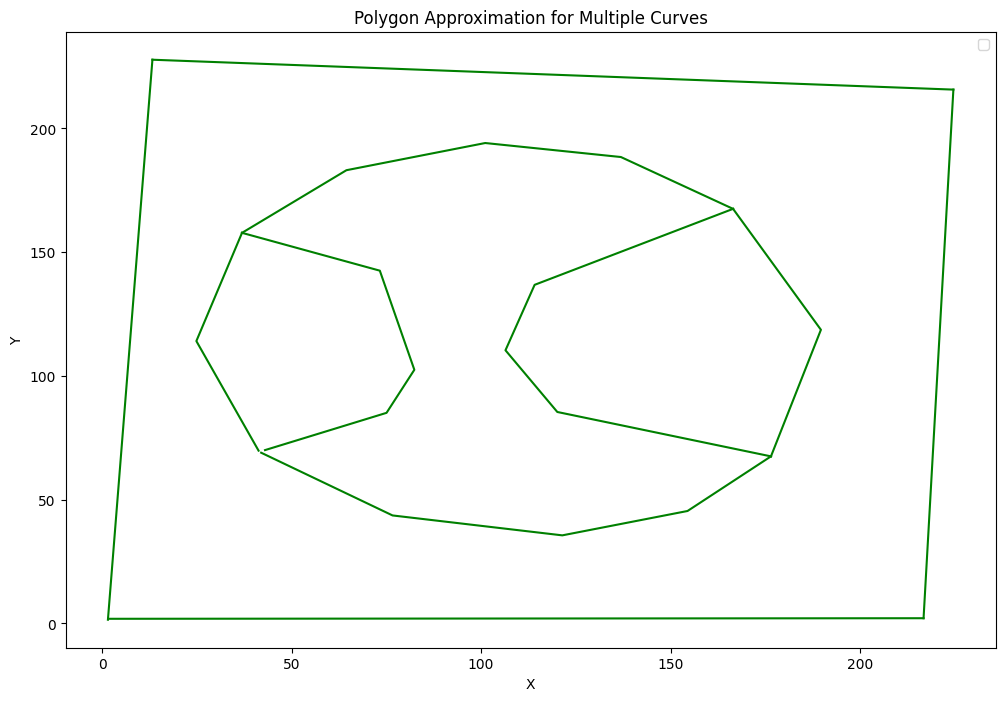

In [ ]:
import csv
from collections import defaultdict
from typing import List, Tuple
import numpy as np
import matplotlib.pyplot as plt

def euclidean_distance(point1: np.ndarray, point2: np.ndarray) -> float:
    return np.linalg.norm(point1 - point2)

def rdp(points: np.ndarray, epsilon: float) -> List[Tuple[float, float]]:
    dmax = 0
    index = 0
    end = len(points)
    for i in range(1, end - 1):
        d = euclidean_distance(points[i], points[0]) + euclidean_distance(points[i], points[-1]) - euclidean_distance(points[0], points[-1])
        if d > dmax:
            index = i
            dmax = d

    if dmax > epsilon:
        results1 = rdp(points[:index + 1], epsilon)
        results2 = rdp(points[index:], epsilon)
        return results1[:-1] + results2
    else:
        return [tuple(points[0]), tuple(points[-1])]

# Read CSV and extract points
curves = defaultdict(list)

with open('./data/problems/frag0.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  # Skip header
    for row in reader:
        try:
            curve_no = int(float(row[0]))  # Convert to float first, then to int
            x = float(row[2])
            y = float(row[3])
            curves[curve_no].append((x, y))
        except ValueError as e:
            print(f"Skipping line due to error: {e}")

# Plot original and simplified curves
plt.figure(figsize=(12, 8))
for curve_no, points in curves.items():
    points_array = np.array(points)
    epsilon = 1.5
    simplified_points = rdp(points_array, epsilon)
    print(simplified_points)

    original_points_x, original_points_y = zip(*points)
    simplified_points_x, simplified_points_y = zip(*simplified_points)

    # plt.plot(original_points_x, original_points_y, 'bo-', label=f'Original Curve {curve_no}')
    plt.plot(simplified_points_x, simplified_points_y, 'g-')

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polygon Approximation for Multiple Curves')
plt.show()


C:\Users\shubh\AppData\Local\Temp\ipykernel_3432\3122097779.py:16: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  return np.linalg.norm(np.cross(line_end - line_start, line_start - point)) / np.linalg.norm(line_end - line_start)


Simplified Curve 0: [(np.float64(41.259605407714844), np.float64(69.81170654296875)), (np.float64(29.6612606048584), np.float64(89.802490234375)), (np.float64(24.888999938964844), np.float64(113.07026672363281)), (np.float64(27.214990615844727), np.float64(136.90220642089844)), (np.float64(36.89099884033203), np.float64(157.80799865722656))]

Simplified Curve 1: [(np.float64(176.5), np.float64(67.5)), (np.float64(164.47193908691406), np.float64(52.987606048583984)), (np.float64(151.41131591796875), np.float64(43.699951171875)), (np.float64(133.96466064453125), np.float64(37.35496139526367)), (np.float64(115.00645446777344), np.float64(35.41154861450195)), (np.float64(94.63214111328125), np.float64(37.797664642333984)), (np.float64(74.02008056640625), np.float64(44.7930908203125)), (np.float64(56.1763801574707), np.float64(55.46207046508789)), (np.float64(41.94200134277344), np.float64(68.9800033569336))]

Simplified Curve 2: [(np.float64(36.89099884033203), np.float64(157.8079986572265

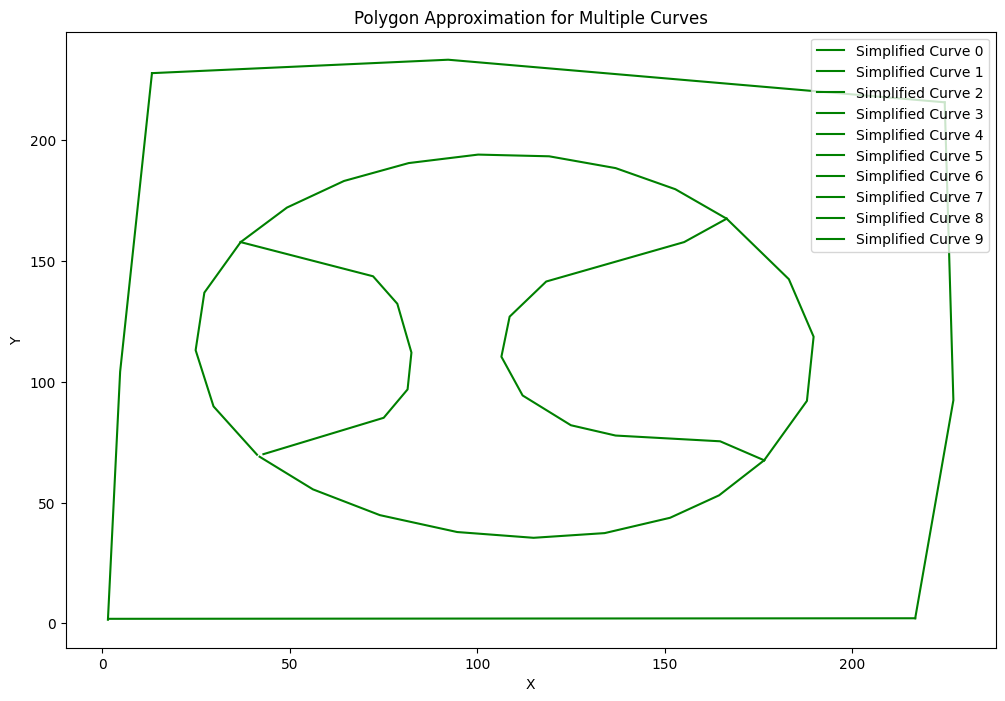

In [ ]:
import csv
from collections import defaultdict
from typing import List, Tuple
import numpy as np
import matplotlib.pyplot as plt

def euclidean_distance(point1: np.ndarray, point2: np.ndarray) -> float:
    return np.linalg.norm(point1 - point2)

def rdp(points: np.ndarray, epsilon: float) -> List[Tuple[float, float]]:
    dmax = 0
    index = 0
    end = len(points)
    for i in range(1, end - 1):
        d = euclidean_distance(points[i], points[0]) + euclidean_distance(points[i], points[-1]) - euclidean_distance(points[0], points[-1])
        if d > dmax:
            index = i
            dmax = d

    if dmax > epsilon:
        results1 = rdp(points[:index + 1], epsilon)
        results2 = rdp(points[index:], epsilon)
        return results1[:-1] + results2
    else:
        return [tuple(points[0]), tuple(points[-1])]

def is_regular_polygon(points: List[Tuple[float, float]], tolerance: float = 0.1) -> bool:
    num_points = len(points)
    if num_points < 3:
        return False
    
    side_lengths = []
    angles = []
    
    for i in range(num_points):
        p1 = np.array(points[i])
        p2 = np.array(points[(i + 1) % num_points])
        p3 = np.array(points[(i + 2) % num_points])
        
        side_lengths.append(euclidean_distance(p1, p2))
        
        v1 = p2 - p1
        v2 = p3 - p2
        angle = np.arccos(np.clip(np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)), -1.0, 1.0))
        angles.append(np.degrees(angle))
    
    avg_side_length = np.mean(side_lengths)
    avg_angle = np.mean(angles)
    
    return (all(abs(s - avg_side_length) / avg_side_length < tolerance for s in side_lengths) and
            all(abs(a - avg_angle) / avg_angle < tolerance for a in angles))

def approximate_to_regular_polygon(points: List[Tuple[float, float]]) -> List[Tuple[float, float]]:
    num_points = len(points)
    center = np.mean(points, axis=0)
    radius = np.mean([euclidean_distance(center, np.array(p)) for p in points])
    
    new_points = []
    for i in range(num_points):
        angle = 2 * np.pi * i / num_points
        x = center[0] + radius * np.cos(angle)
        y = center[1] + radius * np.sin(angle)
        new_points.append((x, y))
    
    return new_points

def merge_lines(points: List[Tuple[float, float]], angle_tolerance: float = 5.0) -> List[Tuple[float, float]]:
    merged_points = [points[0]]
    
    i = 1
    while i < len(points) - 1:
        p1 = np.array(points[i - 1])
        p2 = np.array(points[i])
        p3 = np.array(points[i + 1])
        
        v1 = p2 - p1
        v2 = p3 - p2
        
        angle = np.degrees(np.arccos(np.clip(np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)), -1.0, 1.0)))
        
        if abs(angle - 180) < angle_tolerance:
            merged_points[-1] = tuple((p1 + p3) / 2)
            i += 2
        else:
            merged_points.append(points[i])
            i += 1
    
    merged_points.append(points[-1])
    
    return merged_points

# Read CSV and extract points
curves = defaultdict(list)

with open('./data/problems/frag0.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  # Skip header
    for row in reader:
        try:
            curve_no = int(float(row[0]))  # Convert to float first, then to int
            x = float(row[2])
            y = float(row[3])
            curves[curve_no].append((x, y))
        except ValueError as e:
            print(f"Skipping line due to error: {e}")

# Plot original and simplified curves
plt.figure(figsize=(12, 8))
for curve_no, points in curves.items():
    points_array = np.array(points)
    epsilon = 1.0
    simplified_points = rdp(points_array, epsilon)
    
    if is_regular_polygon(simplified_points):
        regular_polygon_points = approximate_to_regular_polygon(simplified_points)
        regular_polygon_x, regular_polygon_y = zip(*regular_polygon_points)
        plt.plot(regular_polygon_x, regular_polygon_y, 'go-', label=f'Regular Polygon {curve_no}')
    else:
        merged_points = merge_lines(simplified_points)
        merged_points_x, merged_points_y = zip(*merged_points)
        plt.plot(merged_points_x, merged_points_y, 'ro-', label=f'Curve {curve_no}')

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polygon Approximation for Multiple Curves')
plt.show()
